# 타 국가의 은행 파산이 국내 금융지주사에 미치는 영향

공변량 후보: 미국, 한국(환율, 경제 성장률, GDP, 금리, 주식지수)

환율 USD, KRW, USD/KRW  V

주식 지수: KOSPI, KRX100, DJI 

무역 거래량? 외교지수?

## 데이터 준비

In [1]:
import FinanceDataReader as fdr
import pandas as pd
from pandas.tseries.offsets import CustomBusinessDay
import numpy as np
from datetime import datetime, timedelta
from causalimpact import CausalImpact
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_o=pd.read_csv('C:/Users/Edward/Desktop/PythonWorkspace/인허가/df_o_new.csv')
df_c=pd.read_csv('C:/Users/Edward/Desktop/PythonWorkspace/인허가/df_c_new.csv')

In [3]:
# KS11 (KOSPI 지수), 2022년~현재
df = fdr.DataReader('KS11', '2021')
df = pd.DataFrame(df)
x = pd.DataFrame(df['Close'])
x

Close
Date                   
2021-01-04  2944.449951
2021-01-05  2990.570068
2021-01-06  2968.209961
2021-01-07  3031.679932
2021-01-08  3152.179932
...                 ...
2023-09-22  2508.129883
2023-09-25  2495.760010
2023-09-26  2462.969971
2023-09-27  2465.070068
2023-10-04  2411.350098

[678 rows x 1 columns]

In [4]:
df1 = fdr.DataReader('105560', '2021') #KB
df1 = pd.DataFrame(df1)
df1

Open   High    Low  Close   Volume    Change
Date                                                     
2021-01-04  43150  43150  42150  42450  2825436 -0.021889
2021-01-05  42600  43750  41900  43550  3108053  0.025913
2021-01-06  43850  44700  43350  44000  3637798  0.010333
2021-01-07  45550  46300  45300  46000  4683821  0.045455
2021-01-08  46800  46800  45550  46500  3696066  0.010870
...           ...    ...    ...    ...      ...       ...
2023-09-22  57300  57600  57000  57500   833696  0.003490
2023-09-25  57600  57700  56700  57400   843047 -0.001739
2023-09-26  56800  57500  55400  55700  1368399 -0.029617
2023-09-27  55200  55700  54800  55300  1302149 -0.007181
2023-10-04  55500  55600  54500  55100   493174 -0.003617

[680 rows x 6 columns]

In [5]:
df2 = fdr.DataReader('316140', '2021') #우리
df2 = pd.DataFrame(df2)
df2

Open   High    Low  Close   Volume    Change
Date                                                     
2021-01-04   9600   9700   9510   9510  2227495 -0.022610
2021-01-05   9530   9630   9410   9610  2318934  0.010515
2021-01-06   9590   9730   9450   9580  3594459 -0.003122
2021-01-07   9800   9920   9720   9840  4155453  0.027140
2021-01-08   9900   9920   9730   9910  3068580  0.007114
...           ...    ...    ...    ...      ...       ...
2023-09-22  12400  12530  12360  12530  2029019  0.001599
2023-09-25  12550  12560  12400  12430  1908625 -0.007981
2023-09-26  12410  12420  12190  12220  2268365 -0.016895
2023-09-27  12120  12270  12120  12260  1574362  0.003273
2023-10-04  12130  12190  12050  12120   996406 -0.011419

[680 rows x 6 columns]

In [6]:
df3 = fdr.DataReader('086790', '2021') #하나
df3 = pd.DataFrame(df3)
df3

Open   High    Low  Close   Volume    Change
Date                                                     
2021-01-04  34000  34050  33250  33450  2312196 -0.030435
2021-01-05  33250  34100  32750  34050  2441785  0.017937
2021-01-06  34150  35300  33900  34750  3379422  0.020558
2021-01-07  36000  36800  35650  36800  4379391  0.058993
2021-01-08  37100  37900  36450  37700  3631187  0.024457
...           ...    ...    ...    ...      ...       ...
2023-09-22  43850  44500  43750  44400  1287766  0.003390
2023-09-25  44500  44600  43750  43950  1028201 -0.010135
2023-09-26  43500  43550  42400  42600  1323978 -0.030717
2023-09-27  42100  42750  41900  42450   823502 -0.003521
2023-10-04  41950  42250  41300  41850   379517 -0.014134

[680 rows x 6 columns]

In [7]:
df4 = fdr.DataReader('055550', '2021') #신한
df4 = pd.DataFrame(df4)
df4

Open   High    Low  Close   Volume    Change
Date                                                     
2021-01-04  32050  32050  31500  31550  2983516 -0.015601
2021-01-05  31500  32250  31200  32100  3411233  0.017433
2021-01-06  32200  32800  31950  32400  4751214  0.009346
2021-01-07  33500  33900  33300  33750  6546753  0.041667
2021-01-08  34200  34250  33250  33650  4748235 -0.002963
...           ...    ...    ...    ...      ...       ...
2023-09-22  37200  37550  37100  37450   663062 -0.001333
2023-09-25  37450  37500  36850  37100   961489 -0.009346
2023-09-26  36550  36700  35500  35600  1330083 -0.040431
2023-09-27  35250  35850  35100  35600   749827  0.000000
2023-10-04  35050  35350  34700  34950   574121 -0.018258

[680 rows x 6 columns]

In [8]:
df5 = fdr.DataReader('139130', '2021') #DGB
df5 = pd.DataFrame(df5)
df5

Open  High   Low  Close   Volume    Change
Date                                                  
2021-01-04  6800  6850  6610   6660  1034781 -0.019146
2021-01-05  6650  6790  6620   6780   956497  0.018018
2021-01-06  6770  6840  6700   6800   948272  0.002950
2021-01-07  6960  7250  6880   7200  1870252  0.058824
2021-01-08  7230  7320  6890   7230  1103273  0.004167
...          ...   ...   ...    ...      ...       ...
2023-09-22  8010  8090  7920   8080   373950  0.004975
2023-09-25  8080  8130  7980   8080   391684  0.000000
2023-09-26  8050  8060  7870   7880   525972 -0.024752
2023-09-27  7870  7930  7800   7870   381261 -0.001269
2023-10-04  7860  7860  7700   7710   220030 -0.020330

[680 rows x 6 columns]

In [9]:
df6 = fdr.DataReader('138930', '2021') #BNK
df6 = pd.DataFrame(df6)
df6

Open  High   Low  Close   Volume    Change
Date                                                  
2021-01-04  5650  5660  5510   5560  2067437 -0.021127
2021-01-05  5510  5590  5480   5580  2758276  0.003597
2021-01-06  5590  5670  5520   5570  6467687 -0.001792
2021-01-07  5720  5790  5670   5780  3856777  0.037702
2021-01-08  5830  5840  5710   5780  3213667  0.000000
...          ...   ...   ...    ...      ...       ...
2023-09-22  6950  7050  6930   7040   682325  0.008596
2023-09-25  7080  7080  6960   7020   603854 -0.002841
2023-09-26  6970  7020  6890   6890   956167 -0.018519
2023-09-27  6860  6930  6820   6850   811454 -0.005806
2023-10-04  6820  6820  6740   6760   311438 -0.013139

[680 rows x 6 columns]

In [10]:
df7 = fdr.DataReader('175330', '2021') #JB
df7 = pd.DataFrame(df7)
df7

Open   High    Low  Close  Volume    Change
Date                                                    
2021-01-04   5640   5650   5440   5480  712462 -0.028369
2021-01-05   5540   5590   5450   5590  538026  0.020073
2021-01-06   5610   5630   5490   5520  605600 -0.012522
2021-01-07   5650   5720   5610   5680  973122  0.028986
2021-01-08   5750   5760   5670   5710  633366  0.005282
...           ...    ...    ...    ...     ...       ...
2023-09-22  10160  10490  10160  10480  553302  0.015504
2023-09-25  10530  10530  10190  10380  418526 -0.009542
2023-09-26  10270  10270   9980  10100  510613 -0.026975
2023-09-27  10010  10140   9910   9960  364664 -0.013861
2023-10-04   9980   9990   9670   9750  211461 -0.021084

[680 rows x 6 columns]

In [11]:
start_date = "2021-01-04"
end_date = "2023-06-30"

In [12]:
dfs = []  # DataFrame들을 저장할 리스트

for i in range(1, 8):
    df = eval('df{}'.format(i))  # 직접 DataFrame에 접근
    dfs.append(df['Close'])  # 'Close' 열을 리스트에 추가

# DataFrame들을 병합
merged_df = dfs[0]  # 첫 번째 DataFrame으로 시작
for i in range(1, len(dfs)):
    merged_df = pd.merge(merged_df, dfs[i], on='Date', how='inner')

# 병합된 DataFrame 출력
merged_df

Close_x  Close_y  Close_x  Close_y  Close_x  Close_y  Close
Date                                                                   
2021-01-04    42450     9510    33450    31550     6660     5560   5480
2021-01-05    43550     9610    34050    32100     6780     5580   5590
2021-01-06    44000     9580    34750    32400     6800     5570   5520
2021-01-07    46000     9840    36800    33750     7200     5780   5680
2021-01-08    46500     9910    37700    33650     7230     5780   5710
...             ...      ...      ...      ...      ...      ...    ...
2023-09-22    57500    12530    44400    37450     8080     7040  10480
2023-09-25    57400    12430    43950    37100     8080     7020  10380
2023-09-26    55700    12220    42600    35600     7880     6890  10100
2023-09-27    55300    12260    42450    35600     7870     6850   9960
2023-10-04    55100    12120    41850    34950     7710     6760   9750

[680 rows x 7 columns]

In [13]:
# 열 이름에 숫자를 붙여 변경
new_columns = [f'Close_{i+1}' for i in range(len(merged_df.columns))]
merged_df.columns = new_columns

# 변경된 열 이름 확인
print(merged_df.columns)
merged_df = pd.DataFrame(merged_df)

Index(['Close_1', 'Close_2', 'Close_3', 'Close_4', 'Close_5', 'Close_6',
       'Close_7'],
      dtype='object')


In [14]:
merged_df.to_csv('merged_df1.csv')

In [15]:
x.reset_index(inplace=True)
x['Date'] = pd.to_datetime(x['Date'])
x.set_index('Date')
x

Date        Close
0   2021-01-04  2944.449951
1   2021-01-05  2990.570068
2   2021-01-06  2968.209961
3   2021-01-07  3031.679932
4   2021-01-08  3152.179932
..         ...          ...
673 2023-09-22  2508.129883
674 2023-09-25  2495.760010
675 2023-09-26  2462.969971
676 2023-09-27  2465.070068
677 2023-10-04  2411.350098

[678 rows x 2 columns]

In [16]:
merged_df.reset_index(inplace=True)
merged_df['Date'] = pd.to_datetime(merged_df['Date'])
merged_df.set_index('Date')
merged_df = merged_df[(merged_df["Date"] >= start_date) & (merged_df["Date"] <= end_date)]
merged_df

Date  Close_1  Close_2  Close_3  Close_4  Close_5  Close_6  Close_7
0   2021-01-04    42450     9510    33450    31550     6660     5560     5480
1   2021-01-05    43550     9610    34050    32100     6780     5580     5590
2   2021-01-06    44000     9580    34750    32400     6800     5570     5520
3   2021-01-07    46000     9840    36800    33750     7200     5780     5680
4   2021-01-08    46500     9910    37700    33650     7230     5780     5710
..         ...      ...      ...      ...      ...      ...      ...      ...
612 2023-06-26    47200    11960    39650    34650     7140     6810     8560
613 2023-06-27    47550    11960    39850    34650     7190     6910     8540
614 2023-06-28    48150    11980    40250    34700     7240     6960     8520
615 2023-06-29    47100    11610    38800    33850     7080     6780     8470
616 2023-06-30    47750    11790    39200    34000     7270     6930     8470

[617 rows x 8 columns]

In [17]:
# 주중, 주말 및 공휴일 설정
weekmask = 'Mon Tue Wed Thu Fri'
weekend = ['Sat', 'Sun']  # 주말 설정
today = datetime.now()
tomorrow = today + timedelta(1)
holidays = pd.to_datetime(['2021-01-01', '2023-06-30'])  # 공휴일 날짜 설정
today = today.strftime('%Y-%m-%d')

# CustomBusinessDay 객체 생성
custom_business_day = CustomBusinessDay(weekmask=weekmask, holidays=holidays, calendar=weekend)

# 주말과 공휴일을 포함한 모든 비즈니스 데이 날짜 생성
business_dates = pd.date_range(start=merged_df['Date'].min(), end=merged_df['Date'].max(), freq=custom_business_day)

# 주말과 공휴일을 포함한 모든 날짜로 데이터프레임 재생성
merged_df.set_index('Date', inplace=True)  # 인덱스 재설정
merged_df = merged_df.reindex(business_dates)

x.set_index('Date', inplace=True)
x = x.reindex(business_dates)

# 결측치를 이전 유효한 값으로 채우기
merged_df = merged_df.fillna(method='ffill')

x = x.fillna(method='bfill')

# 변경된 데이터프레임 출력
merged_df

Close_1  Close_2  Close_3  Close_4  Close_5  Close_6  Close_7
2021-01-04  42450.0   9510.0  33450.0  31550.0   6660.0   5560.0   5480.0
2021-01-05  43550.0   9610.0  34050.0  32100.0   6780.0   5580.0   5590.0
2021-01-06  44000.0   9580.0  34750.0  32400.0   6800.0   5570.0   5520.0
2021-01-07  46000.0   9840.0  36800.0  33750.0   7200.0   5780.0   5680.0
2021-01-08  46500.0   9910.0  37700.0  33650.0   7230.0   5780.0   5710.0
...             ...      ...      ...      ...      ...      ...      ...
2023-06-23  46950.0  11930.0  39950.0  34400.0   7190.0   6860.0   8510.0
2023-06-26  47200.0  11960.0  39650.0  34650.0   7140.0   6810.0   8560.0
2023-06-27  47550.0  11960.0  39850.0  34650.0   7190.0   6910.0   8540.0
2023-06-28  48150.0  11980.0  40250.0  34700.0   7240.0   6960.0   8520.0
2023-06-29  47100.0  11610.0  38800.0  33850.0   7080.0   6780.0   8470.0

[649 rows x 7 columns]

In [18]:
x

Close
2021-01-04  2944.449951
2021-01-05  2990.570068
2021-01-06  2968.209961
2021-01-07  3031.679932
2021-01-08  3152.179932
...                 ...
2023-06-23  2570.100098
2023-06-26  2582.199951
2023-06-27  2581.389893
2023-06-28  2564.189941
2023-06-29  2550.020020

[649 rows x 1 columns]

In [19]:
merged_df.columns = ['KB', '우리', '하나', '신한', 'DGB', 'BNK', 'JB']
merged_df

KB       우리       하나       신한     DGB     BNK      JB
2021-01-04  42450.0   9510.0  33450.0  31550.0  6660.0  5560.0  5480.0
2021-01-05  43550.0   9610.0  34050.0  32100.0  6780.0  5580.0  5590.0
2021-01-06  44000.0   9580.0  34750.0  32400.0  6800.0  5570.0  5520.0
2021-01-07  46000.0   9840.0  36800.0  33750.0  7200.0  5780.0  5680.0
2021-01-08  46500.0   9910.0  37700.0  33650.0  7230.0  5780.0  5710.0
...             ...      ...      ...      ...     ...     ...     ...
2023-06-23  46950.0  11930.0  39950.0  34400.0  7190.0  6860.0  8510.0
2023-06-26  47200.0  11960.0  39650.0  34650.0  7140.0  6810.0  8560.0
2023-06-27  47550.0  11960.0  39850.0  34650.0  7190.0  6910.0  8540.0
2023-06-28  48150.0  11980.0  40250.0  34700.0  7240.0  6960.0  8520.0
2023-06-29  47100.0  11610.0  38800.0  33850.0  7080.0  6780.0  8470.0

[649 rows x 7 columns]

In [20]:
merged_df.to_csv('merged_df.csv')

### 데이터 합치기

In [22]:
df_c

폐업일자  담배소매업  목욕장업  숙박업  석유판매업  일반음식점  집단급식소  이용업  휴게음식점  \
0      1900-01-01      5     1    1      0      0      0    0      0   
1      1961-07-11      0     1    0      0      0      0    0      0   
2      1967-07-10      0     0    1      0      0      0    0      0   
3      1967-09-28      0     0    1      0      0      0    0      0   
4      1969-09-04      0     0    0      1      0      0    0      0   
...           ...    ...   ...  ...    ...    ...    ...  ...    ...   
13874  2023-09-16      0     0    0      0      0      0    0      0   
13875  2023-09-28      0     0    0      0      0      0    0      0   
13876  2023-09-29      0     0    1      0      0      0    0      0   
13877  2023-09-30      0     0    0      0      0      0    0      0   
13878  2023-10-01      0     0    0      0      0      0    0      0   

       즉석판매제조가공업  ...  환경관리대행기관  요트장업  승강기제조및수입업체  일반야영장업  골프장  동물장묘업  동물미용업  \
0              0  ...         0     0           0       0    0      0      0   
1              0  ...         0     0           0       0    0      0      0   
2              0  ...         0     0           0       0    0      0      0   
3              0  ...         0     0           0       0    0      0      0   
4              0  ...         0     0           0       0    0      0      0   
...          ...  ...       ...   ...         ...     ...  ...    ...    ...   
13874          0  ...         0     0           0       0    0      0      0   
13875          0  ...         0     0           0       0    0      0      0   
13876          0  ...         0     0           0       0    0      0      0   
13877          0  ...         0     0           0       0    0      0      0   
13878          0  ...         0     0           0       0    0      0      0   

       동물위탁관리업  동물운송업  동물전시업  
0            0      0      0  
1            0      0      0  
2            0      0      0  
3            0      0      0  
4            0      0      0  
...        ...    ...    ...  
13874        0      0      0  
13875        0      0      0  
13876        0      0      0  
13877        0      0      0  
13878        0      0      0  

[13879 rows x 164 columns]

In [23]:
# 시작 날짜와 끝나는 날짜 지정
start_date = "2021-01-04"
end_date = "2023-06-29"

# 시계열 생성
df_c['폐업일자'] = pd.to_datetime(df_c['폐업일자'])
df_c = df_c[(df_c["폐업일자"] >= start_date) & (df_c["폐업일자"] <= end_date)]

# 주말과 공휴일을 포함한 모든 날짜로 데이터프레임 재생성
df_c.set_index('폐업일자', inplace=True)  # 인덱스 재설정
df_c = df_c.reindex(business_dates)

# 결측치를 이전 유효한 값으로 채우기
df_c = df_c.fillna(0)

# 변경된 데이터프레임 출력
df_c

담배소매업  목욕장업  숙박업  석유판매업  일반음식점  집단급식소  이용업  휴게음식점  즉석판매제조가공업  약국  \
2021-01-04     49     0    6      3    176     11    4     90         60   8   
2021-01-05     69     2    2      2    188     13    5     94        100   1   
2021-01-06     39     3    5      1    141      8    4     62        144   3   
2021-01-07     41     1    0      0     92      8    2     52        173   2   
2021-01-08     41     0    2      1    122      8    1     56         43   3   
...           ...   ...  ...    ...    ...    ...  ...    ...        ...  ..   
2023-06-23     38     2    3      2    212      7    3     95         86   3   
2023-06-26     61     1    2      0    264      3    9    188         81   2   
2023-06-27     64     4    2      0    294      4    3     72        113   4   
2023-06-28     56     1    5      1    229      7    5    101        301   3   
2023-06-29     57     0    3      0    240      6    4    152        219   0   

            ...  환경관리대행기관  요트장업  승강기제조및수입업체  일반야영장업  골프장  동물장묘업  동물미용업  \
2021-01-04  ...         0     0           0       0    0      0      4   
2021-01-05  ...         0     0           0       0    0      0      2   
2021-01-06  ...         0     0           0       0    0      0      2   
2021-01-07  ...         0     0           0       0    0      0      1   
2021-01-08  ...         0     0           0       0    0      0      0   
...         ...       ...   ...         ...     ...  ...    ...    ...   
2023-06-23  ...         0     0           0       0    0      0      0   
2023-06-26  ...         0     0           0       0    0      0      2   
2023-06-27  ...         0     0           0       0    0      0      4   
2023-06-28  ...         0     0           0       0    0      0      0   
2023-06-29  ...         0     0           0       0    0      0      2   

            동물위탁관리업  동물운송업  동물전시업  
2021-01-04        2      1      1  
2021-01-05        0      0      0  
2021-01-06        2      0      0  
2021-01-07        1      0      0  
2021-01-08        0      1      0  
...             ...    ...    ...  
2023-06-23        0      0      0  
2023-06-26        0      0      0  
2023-06-27        2      2      0  
2023-06-28        1      1      0  
2023-06-29        1      0      0  

[649 rows x 163 columns]

In [24]:
dfc = pd.DataFrame(df_c['일반음식점'])
dfc = dfc.astype(int)
dfc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 649 entries, 2021-01-04 to 2023-06-29
Freq: C
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   일반음식점   649 non-null    int32
dtypes: int32(1)
memory usage: 7.6 KB


# 결과

## SVB 파산

In [ ]:
# SVB 파산
pre_period = ['2021-01-04', '2023-03-09']
post_period = ['2023-03-10', "2023-06-29"]

In [25]:
for index, row in merged_df.iteritems():
    try:
        if row.sum() > 2:
            ci = pd.DataFrame(row).join(x, how='inner')
            ci = ci.join(dfc, how = 'left')
        cib = CausalImpact(ci, pre_period, post_period, model_args={'fit_method': 'hmc'}, nseason=[{'period': 12}])
        summary = cib.summary_data.to_dict()
        print(index + "," + str(round(summary['average'].get('abs_effect'),2)) + ',' + str(round((summary['average'].get('rel_effect')*100),2)) + '%,' + str(round(cib.p_value,2)))
        ci
    except ValueError as e:
        print(e)

KB,-5039.42%,-9.43%,0.0
우리,-838.27%,-6.71%,0.0
하나,-4658.59%,-10.14%,0.0
신한,-4130.84%,-10.54%,0.0
DGB,-853.66%,-10.82%,0.0
BNK,-362.34%,-5.16%,0.0
JB,-836.81%,-8.87%,0.0


In [26]:
ci

JB        Close  일반음식점
2021-01-04  5480.0  2944.449951    176
2021-01-05  5590.0  2990.570068    188
2021-01-06  5520.0  2968.209961    141
2021-01-07  5680.0  3031.679932     92
2021-01-08  5710.0  3152.179932    122
...            ...          ...    ...
2023-06-23  8510.0  2570.100098    212
2023-06-26  8560.0  2582.199951    264
2023-06-27  8540.0  2581.389893    294
2023-06-28  8520.0  2564.189941    229
2023-06-29  8470.0  2550.020020    240

[649 rows x 3 columns]

KB
Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    48378.12           3870250.0
Prediction (s.d.)         53417.54 (626.33)  4273403.53 (50106.18)
95% CI                    [52190.55, 54645.71][4175243.81, 4371656.41]

Absolute effect (s.d.)    -5039.42 (626.33)  -403153.53 (50106.18)
95% CI                    [-6267.58, -3812.42][-501406.41, -304993.81]

Relative effect (s.d.)    -9.43% (1.17%)     -9.43% (1.17%)
95% CI                    [-11.73%, -7.14%]  [-11.73%, -7.14%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


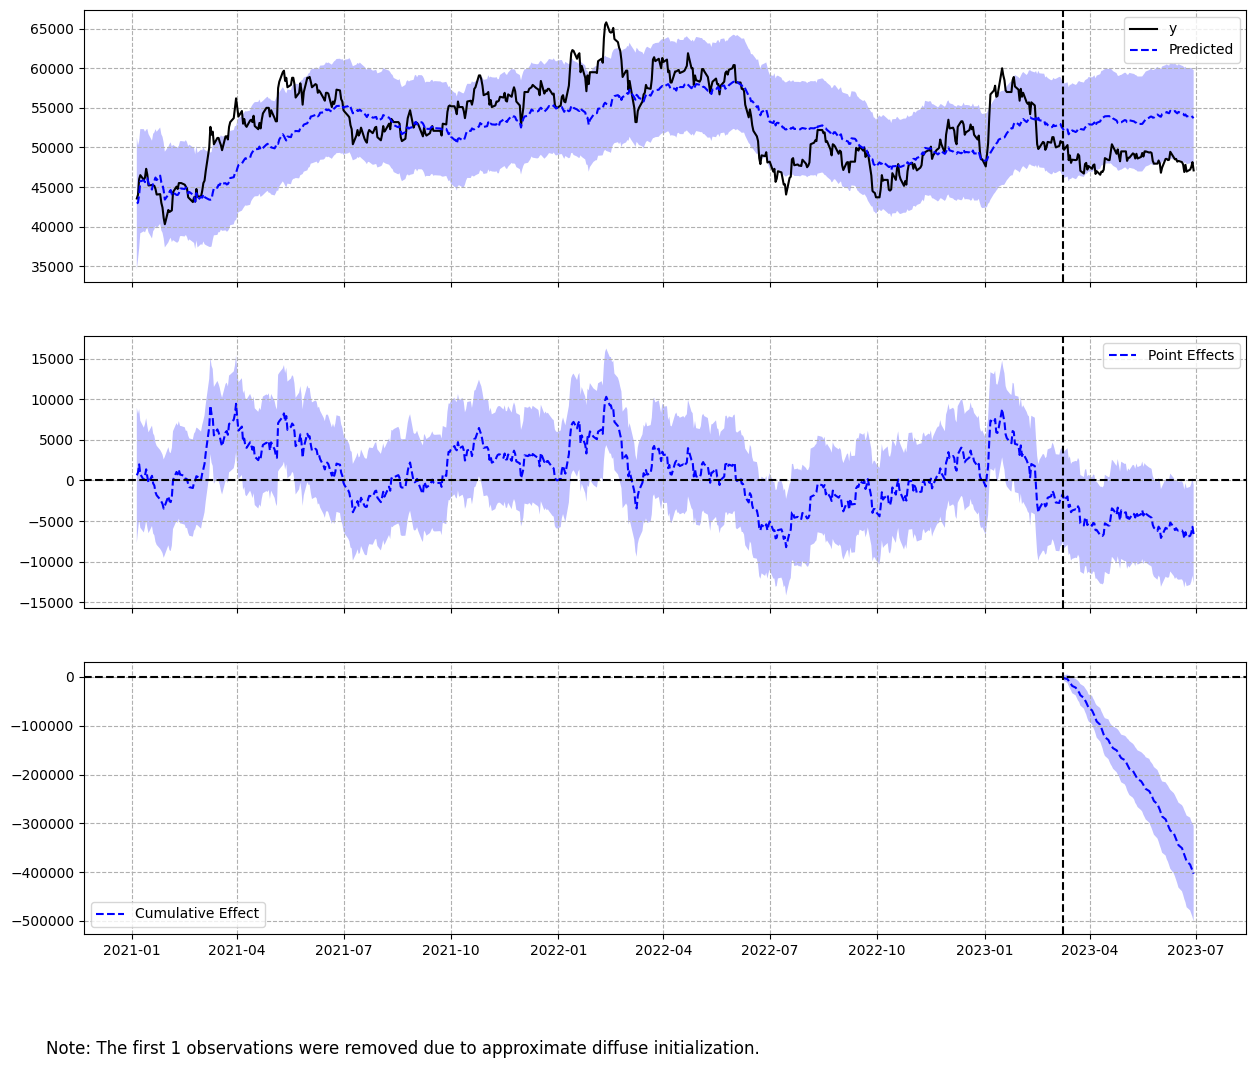

____________________________________________________________________________________________________
우리
Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    11651.5            932120.0
Prediction (s.d.)         12489.77 (153.21)  999181.49 (12256.77)
95% CI                    [12184.97, 12785.54][974797.85, 1022843.49]

Absolute effect (s.d.)    -838.27 (153.21)   -67061.49 (12256.77)
95% CI                    [-1134.04, -533.47][-90723.49, -42677.85]

Relative effect (s.d.)    -6.71% (1.23%)     -6.71% (1.23%)
95% CI                    [-9.08%, -4.27%]   [-9.08%, -4.27%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


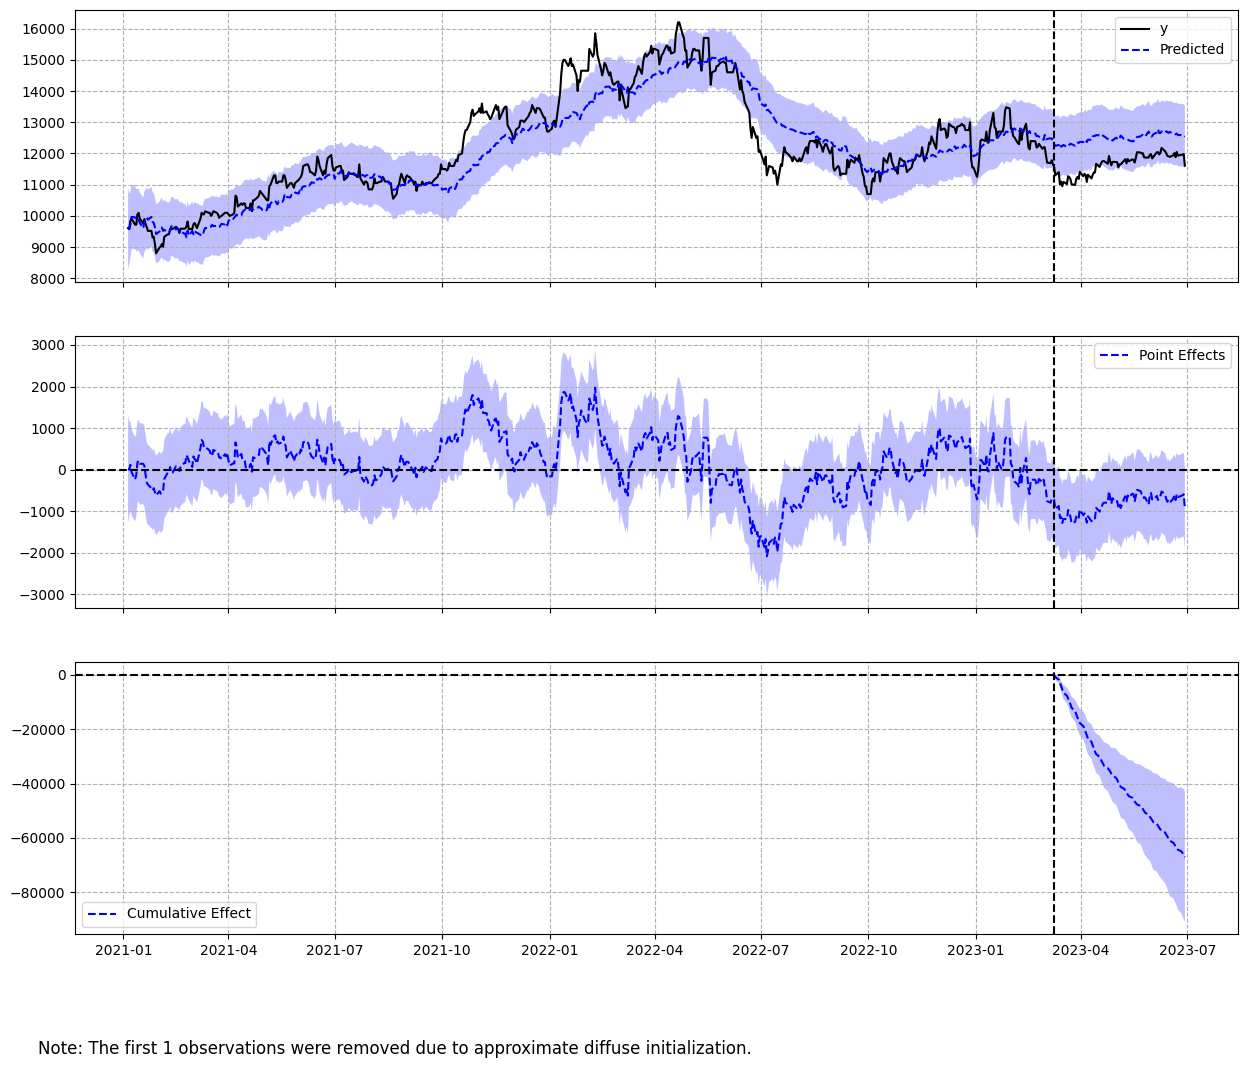

____________________________________________________________________________________________________
하나
Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    41290.62           3303250.0
Prediction (s.d.)         45949.21 (499.84)  3675937.19 (39986.84)
95% CI                    [44973.83, 46933.15][3597906.6, 3754652.12]

Absolute effect (s.d.)    -4658.59 (499.84)  -372687.19 (39986.84)
95% CI                    [-5642.53, -3683.21][-451402.12, -294656.6]

Relative effect (s.d.)    -10.14% (1.09%)    -10.14% (1.09%)
95% CI                    [-12.28%, -8.02%]  [-12.28%, -8.02%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


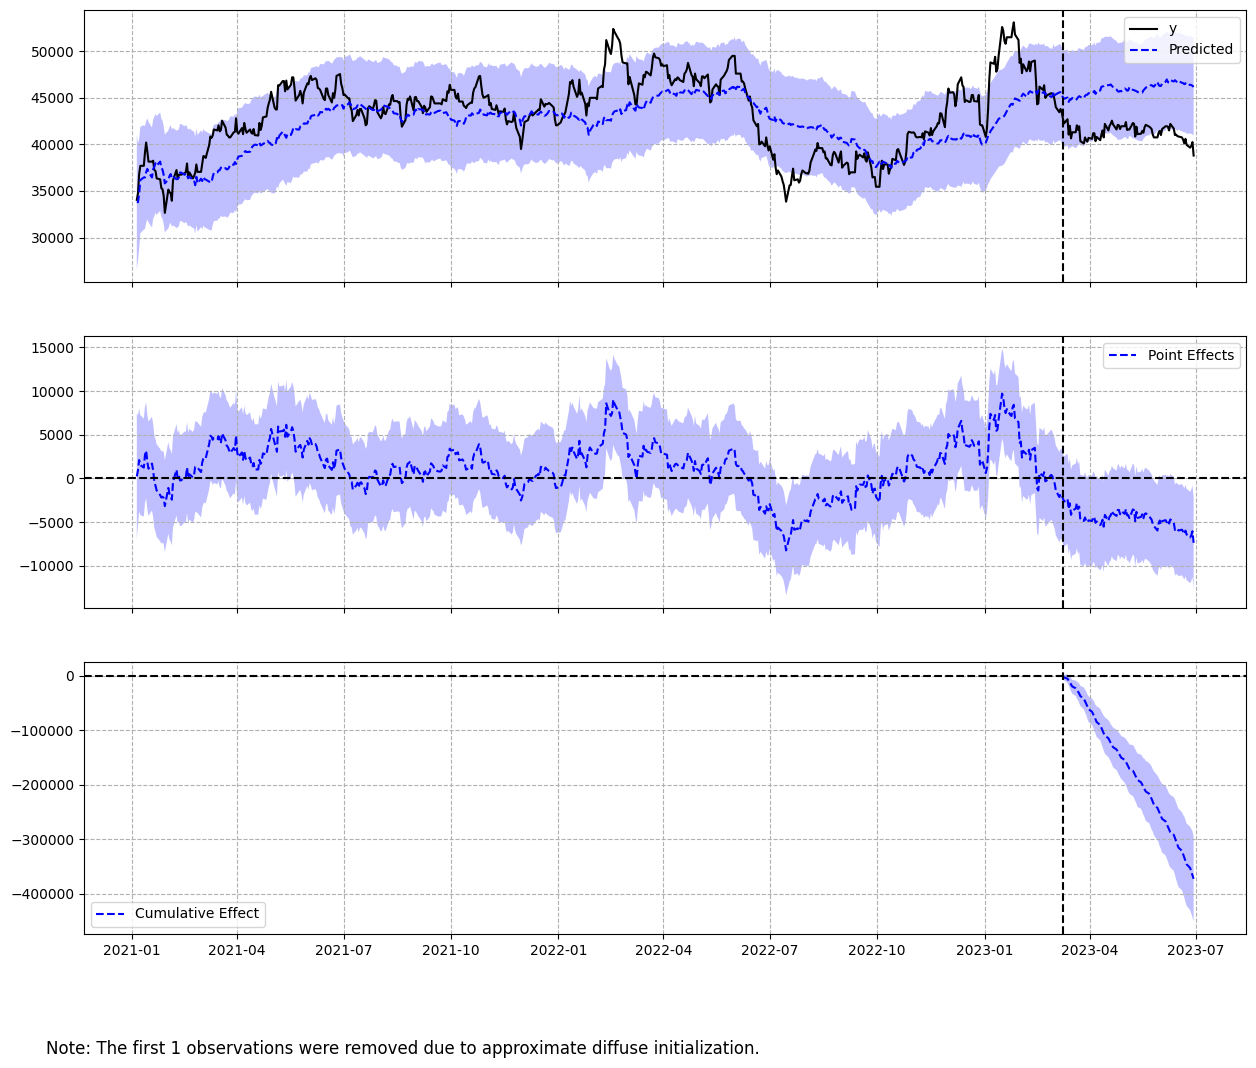

____________________________________________________________________________________________________
신한
Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    35054.38           2804350.0
Prediction (s.d.)         39185.21 (350.25)  3134817.04 (28019.64)
95% CI                    [38439.44, 39812.37][3075154.85, 3184989.82]

Absolute effect (s.d.)    -4130.84 (350.25)  -330467.04 (28019.64)
95% CI                    [-4758.0, -3385.06][-380639.82, -270804.85]

Relative effect (s.d.)    -10.54% (0.89%)    -10.54% (0.89%)
95% CI                    [-12.14%, -8.64%]  [-12.14%, -8.64%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


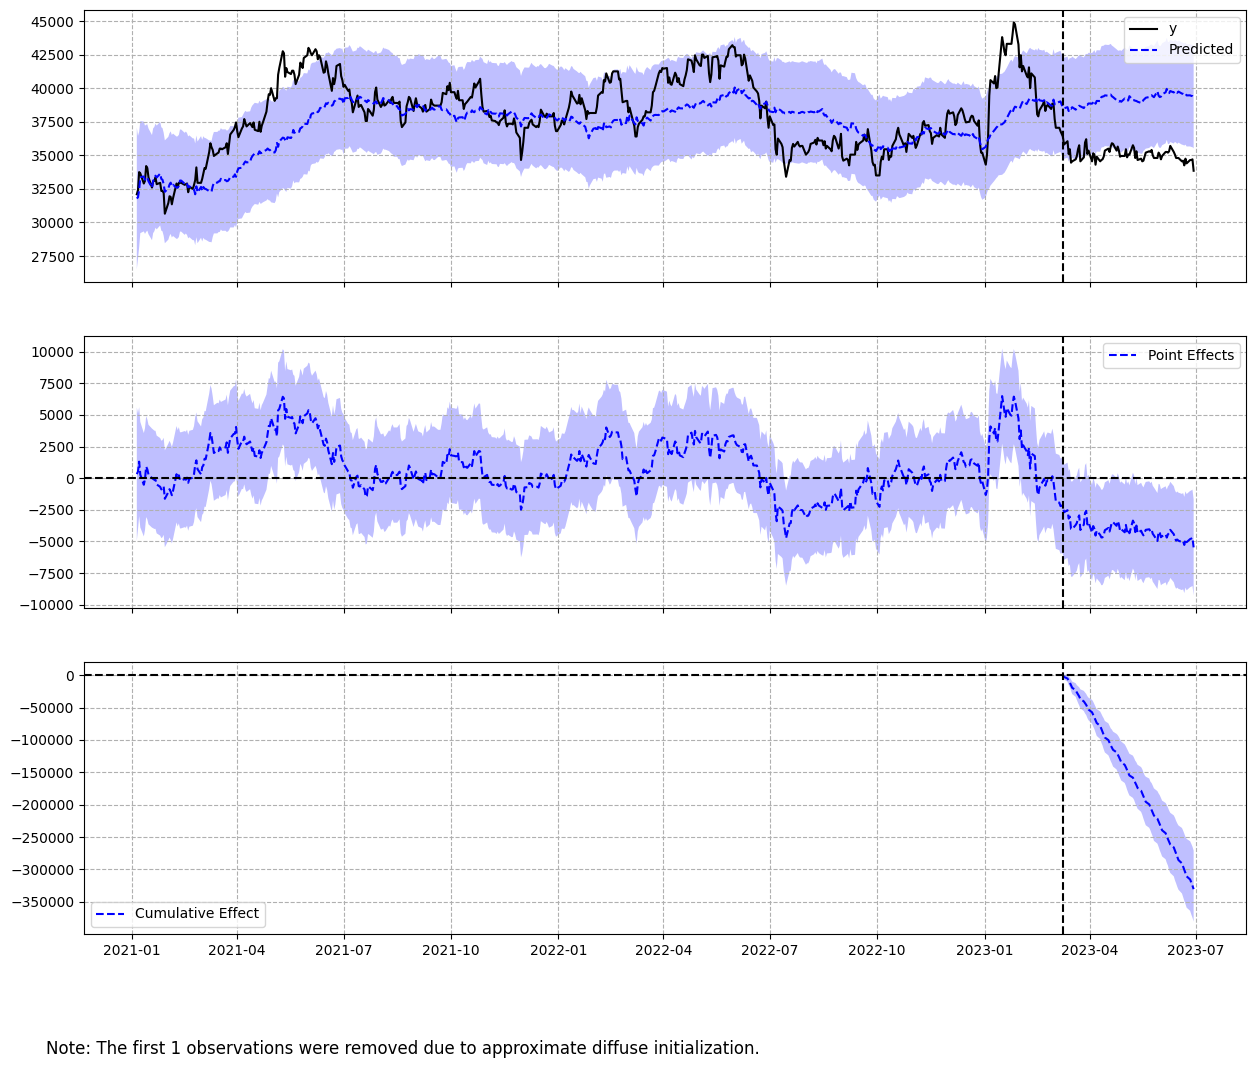

____________________________________________________________________________________________________
DGB
Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    7036.38            562910.0
Prediction (s.d.)         7890.03 (92.05)    631202.69 (7364.27)
95% CI                    [7715.35, 8076.19] [617227.87, 646095.29]

Absolute effect (s.d.)    -853.66 (92.05)    -68292.69 (7364.27)
95% CI                    [-1039.82, -678.97][-83185.29, -54317.87]

Relative effect (s.d.)    -10.82% (1.17%)    -10.82% (1.17%)
95% CI                    [-13.18%, -8.61%]  [-13.18%, -8.61%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


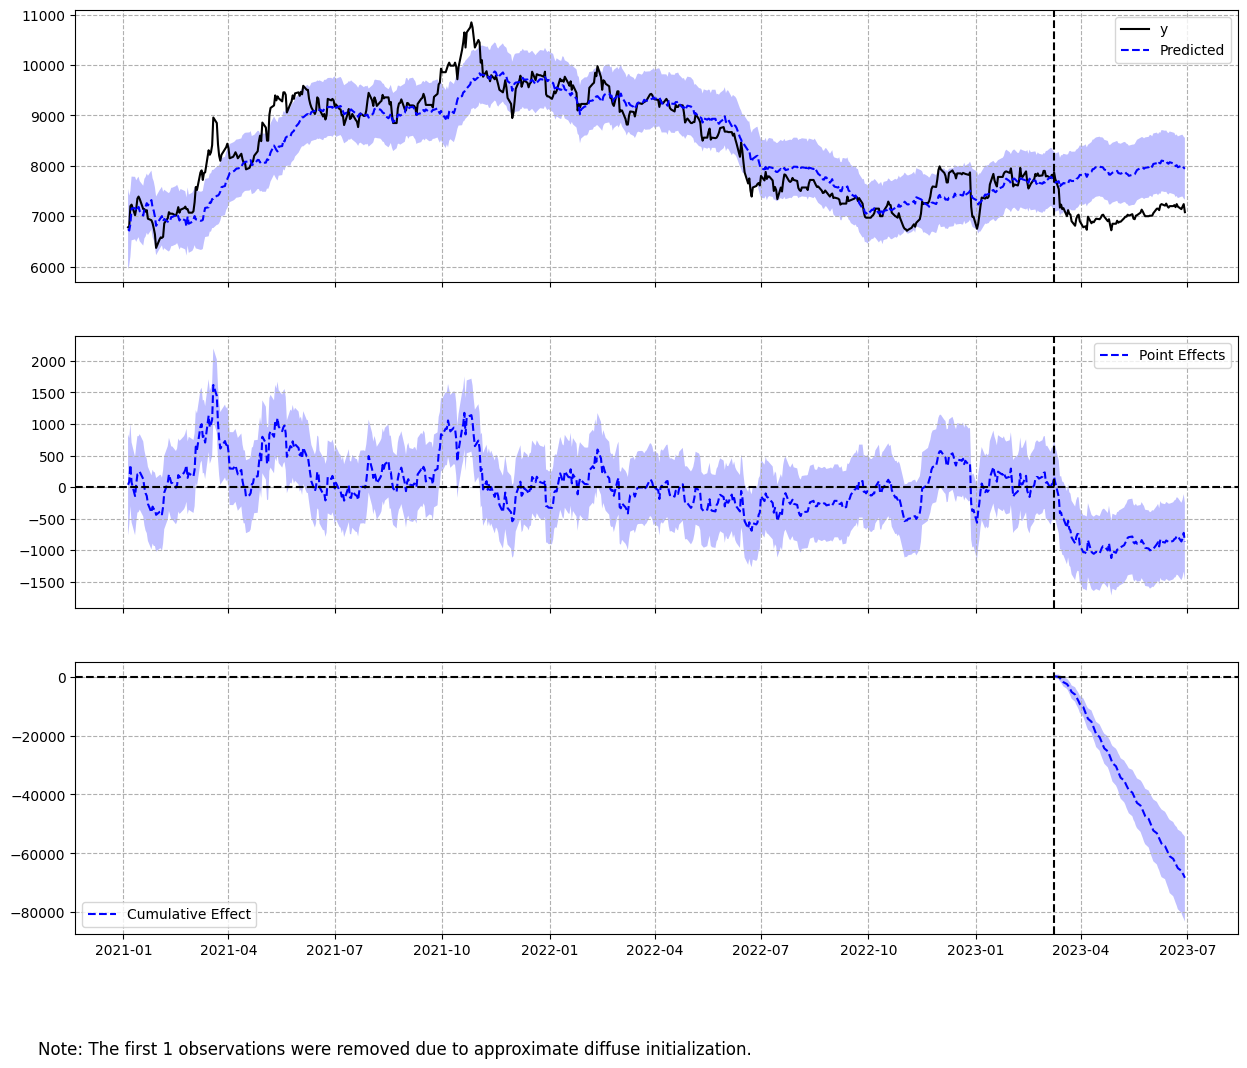

____________________________________________________________________________________________________
BNK
Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    6661.25            532900.0
Prediction (s.d.)         7023.59 (74.51)    561886.99 (5961.19)
95% CI                    [6870.21, 7162.3]  [549616.87, 572984.31]

Absolute effect (s.d.)    -362.34 (74.51)    -28986.99 (5961.19)
95% CI                    [-501.05, -208.96] [-40084.31, -16716.87]

Relative effect (s.d.)    -5.16% (1.06%)     -5.16% (1.06%)
95% CI                    [-7.13%, -2.98%]   [-7.13%, -2.98%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


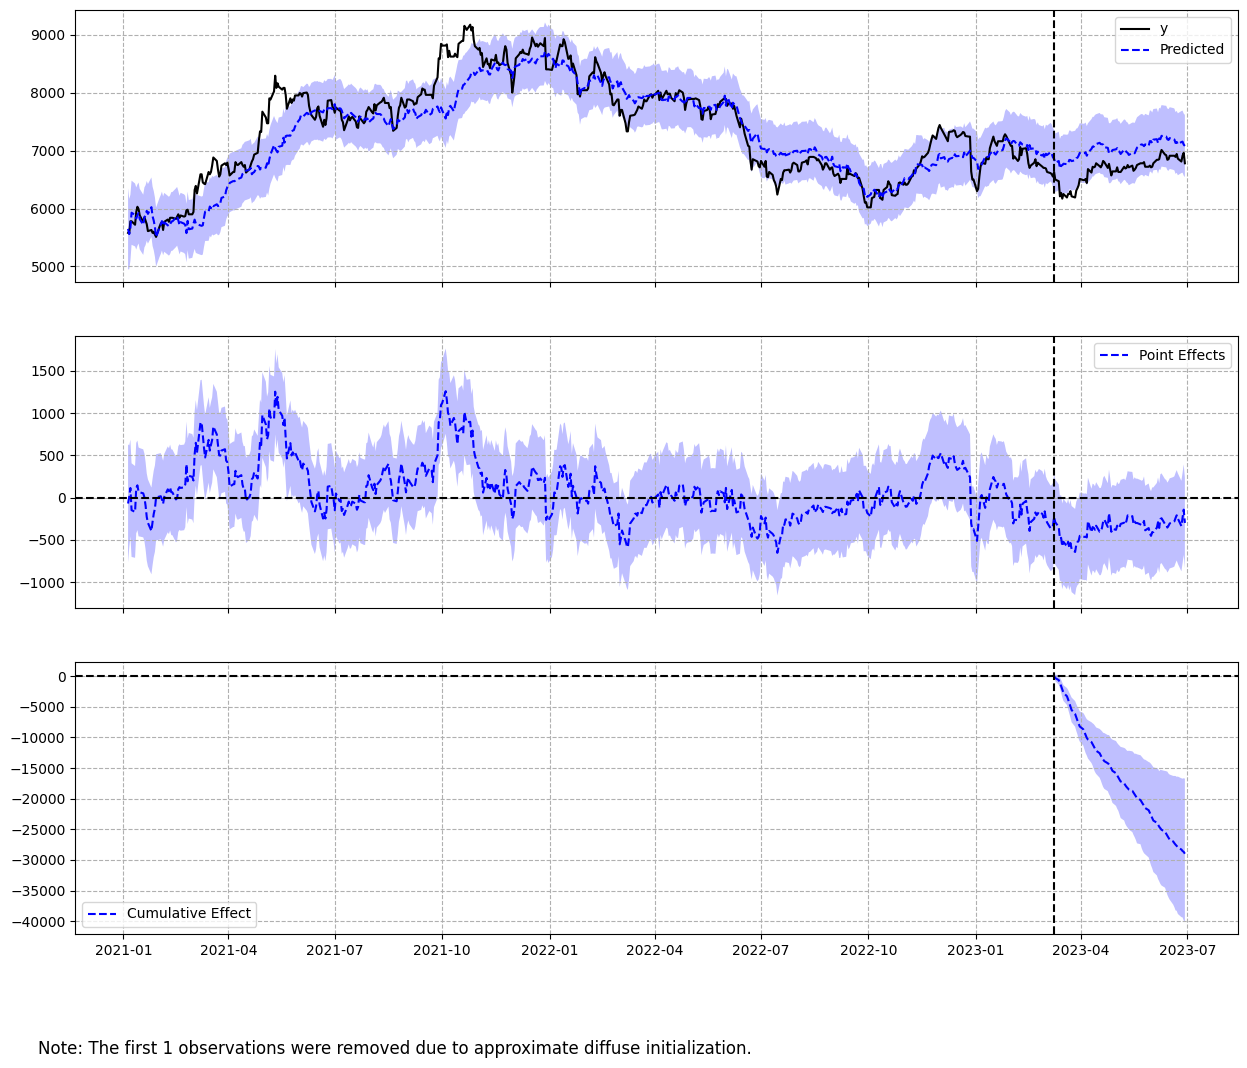

____________________________________________________________________________________________________
JB
Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    8599.88            687990.0
Prediction (s.d.)         9436.68 (94.86)    754934.74 (7588.82)
95% CI                    [9242.86, 9614.71] [739429.09, 769176.7]

Absolute effect (s.d.)    -836.81 (94.86)    -66944.74 (7588.82)
95% CI                    [-1014.83, -642.99][-81186.7, -51439.09]

Relative effect (s.d.)    -8.87% (1.01%)     -8.87% (1.01%)
95% CI                    [-10.75%, -6.81%]  [-10.75%, -6.81%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


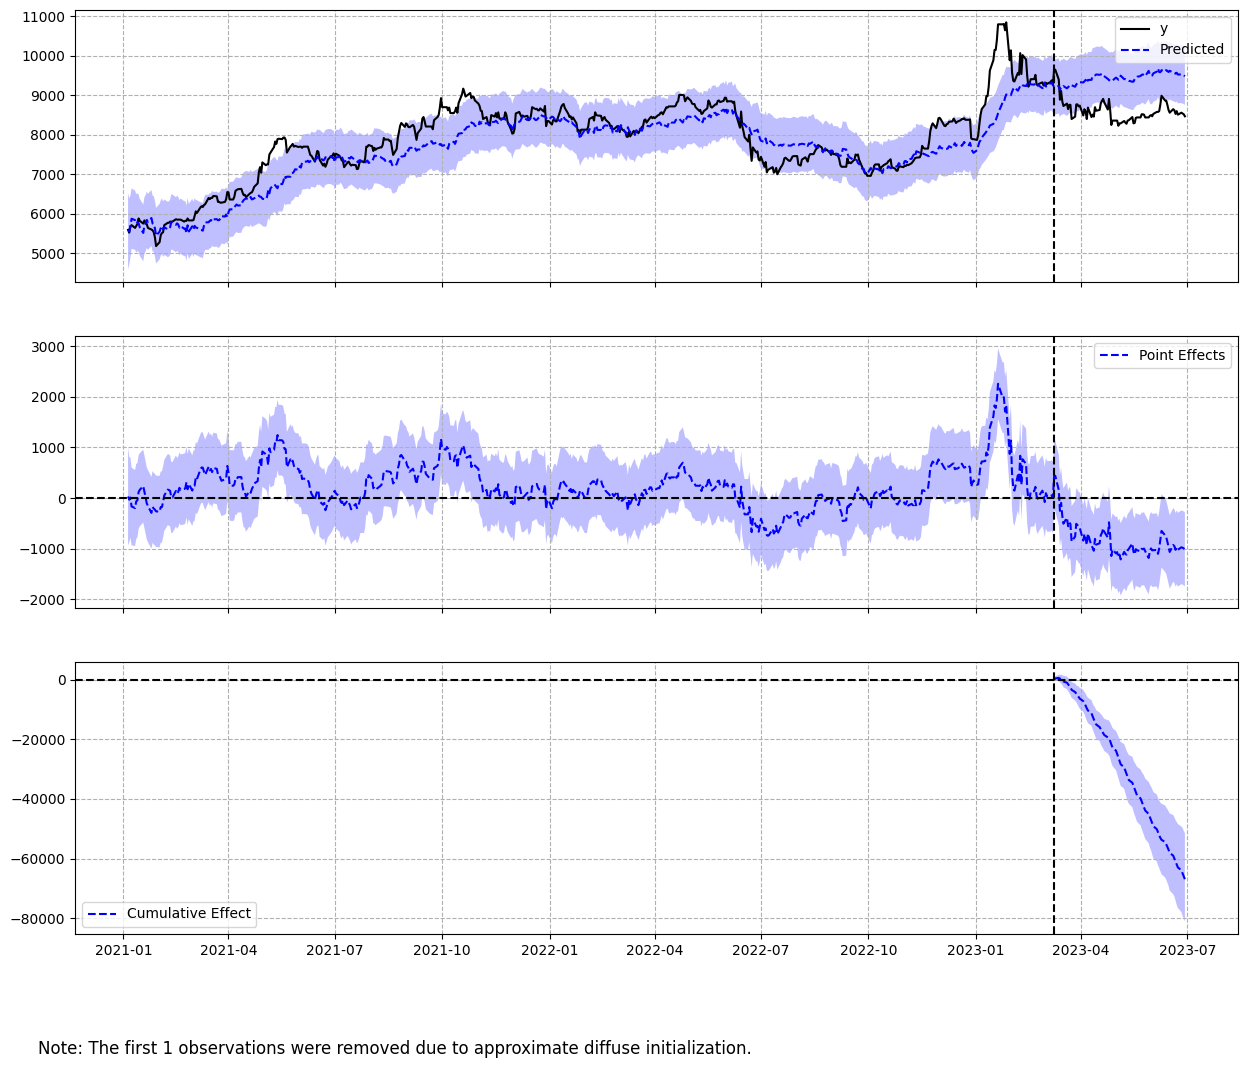

____________________________________________________________________________________________________


In [27]:
for index, row in merged_df.iteritems():
    try:
        if row.sum() > 2:
            ci = pd.DataFrame(row).join(x, how='left')
            ci = ci.join(dfc, how = 'left')
        ci_c = CausalImpact(ci, pre_period, post_period, model_args={'fit_method': 'hmc'}, nseason=[{'period': 12}])
        print(index)
        print(ci_c.summary())
        ci_c.plot()
        print('____________________________________________________________________________________________________')
    except ValueError as e:
        print(e)

## 거리두기 해제

In [28]:
# 거리두기 해제
pre_period = ['2021-01-04', '2022-04-18']
post_period = ['2022-04-19', '2022-07-01']

In [29]:
for index, row in merged_df.iteritems():
    try:
        if row.sum() > 2:
            ci = pd.DataFrame(row).join(x, how='left')
            ci = ci.join(dfc, how = 'left')
        cib = CausalImpact(ci, pre_period, post_period, model_args={'fit_method': 'hmc'}, nseason=[{'period': 12}])
        summary = cib.summary_data.to_dict()
        print(index + "," + str(round(summary['average'].get('abs_effect'),2)) + ',' + str(round((summary['average'].get('rel_effect')*100),2)) + '%,' + str(round(cib.p_value,2)))
    except ValueError as e:
        print(e)

KB,-3254.44%,-5.45%,0.0
우리,-548.5%,-3.63%,0.0
하나,-1152.33%,-2.46%,0.01
신한,2820.86%,7.35%,0.0
DGB,-728.98%,-7.89%,0.0
BNK,-272.79%,-3.47%,0.0
JB,110.59%,1.32%,0.07


KB
Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    56475.93           3049700.0
Prediction (s.d.)         59730.37 (620.35)  3225439.9 (33499.03)
95% CI                    [58511.88, 60943.62][3159641.49, 3290955.29]

Absolute effect (s.d.)    -3254.44 (620.35)  -175739.9 (33499.03)
95% CI                    [-4467.69, -2035.95][-241255.29, -109941.49]

Relative effect (s.d.)    -5.45% (1.04%)     -5.45% (1.04%)
95% CI                    [-7.48%, -3.41%]   [-7.48%, -3.41%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


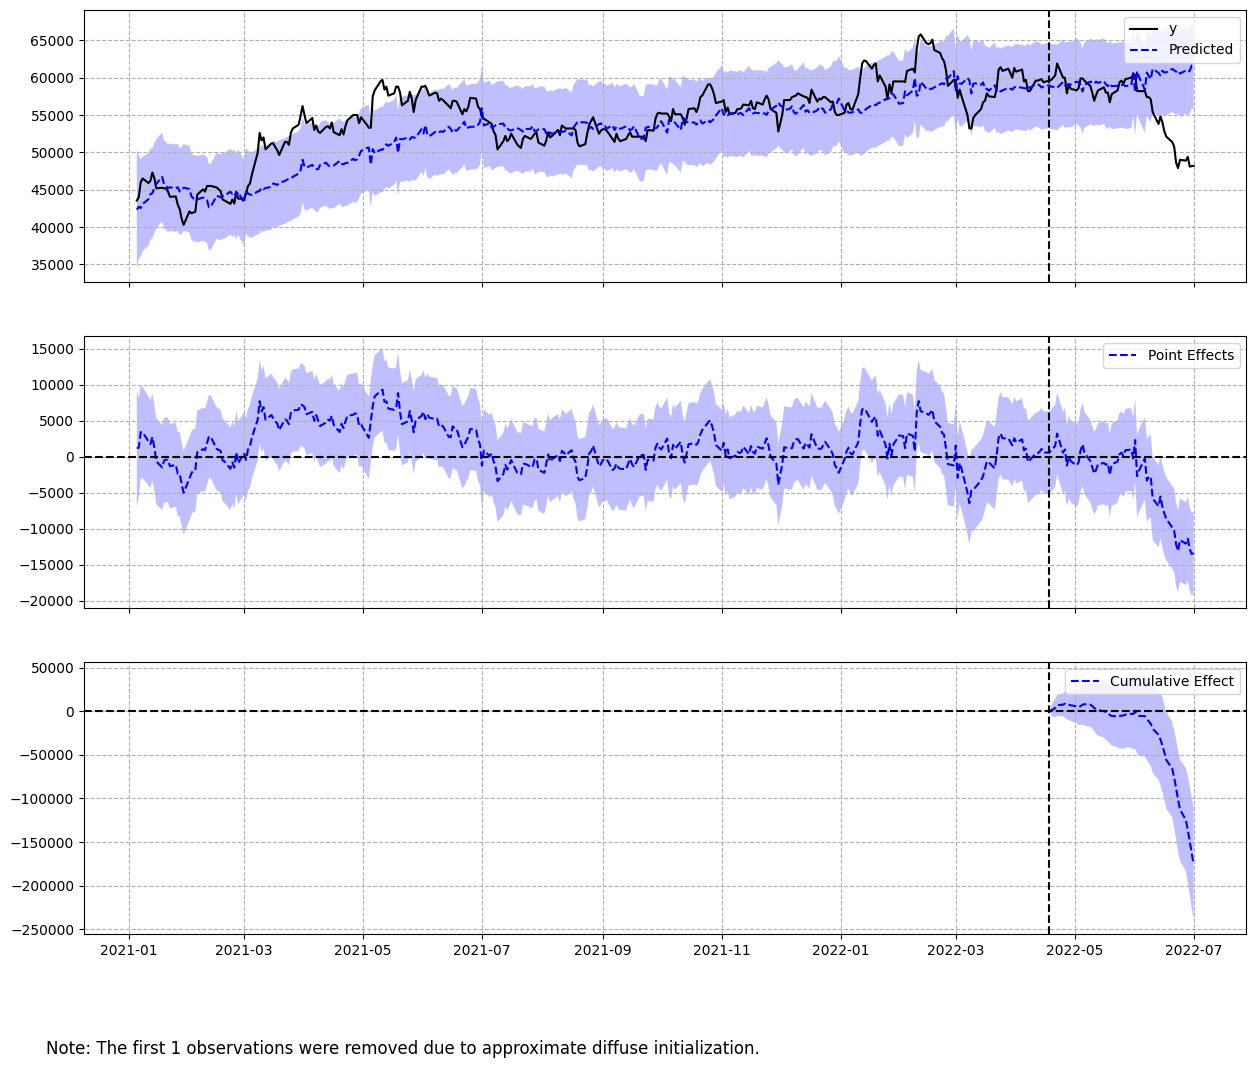

____________________________________________________________________________________________________
우리
Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    14546.3            785500.0
Prediction (s.d.)         15094.8 (140.35)   815119.19 (7578.71)
95% CI                    [14824.01, 15374.16][800496.75, 830204.74]

Absolute effect (s.d.)    -548.5 (140.35)    -29619.19 (7578.71)
95% CI                    [-827.87, -277.72] [-44704.74, -14996.75]

Relative effect (s.d.)    -3.63% (0.93%)     -3.63% (0.93%)
95% CI                    [-5.48%, -1.84%]   [-5.48%, -1.84%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


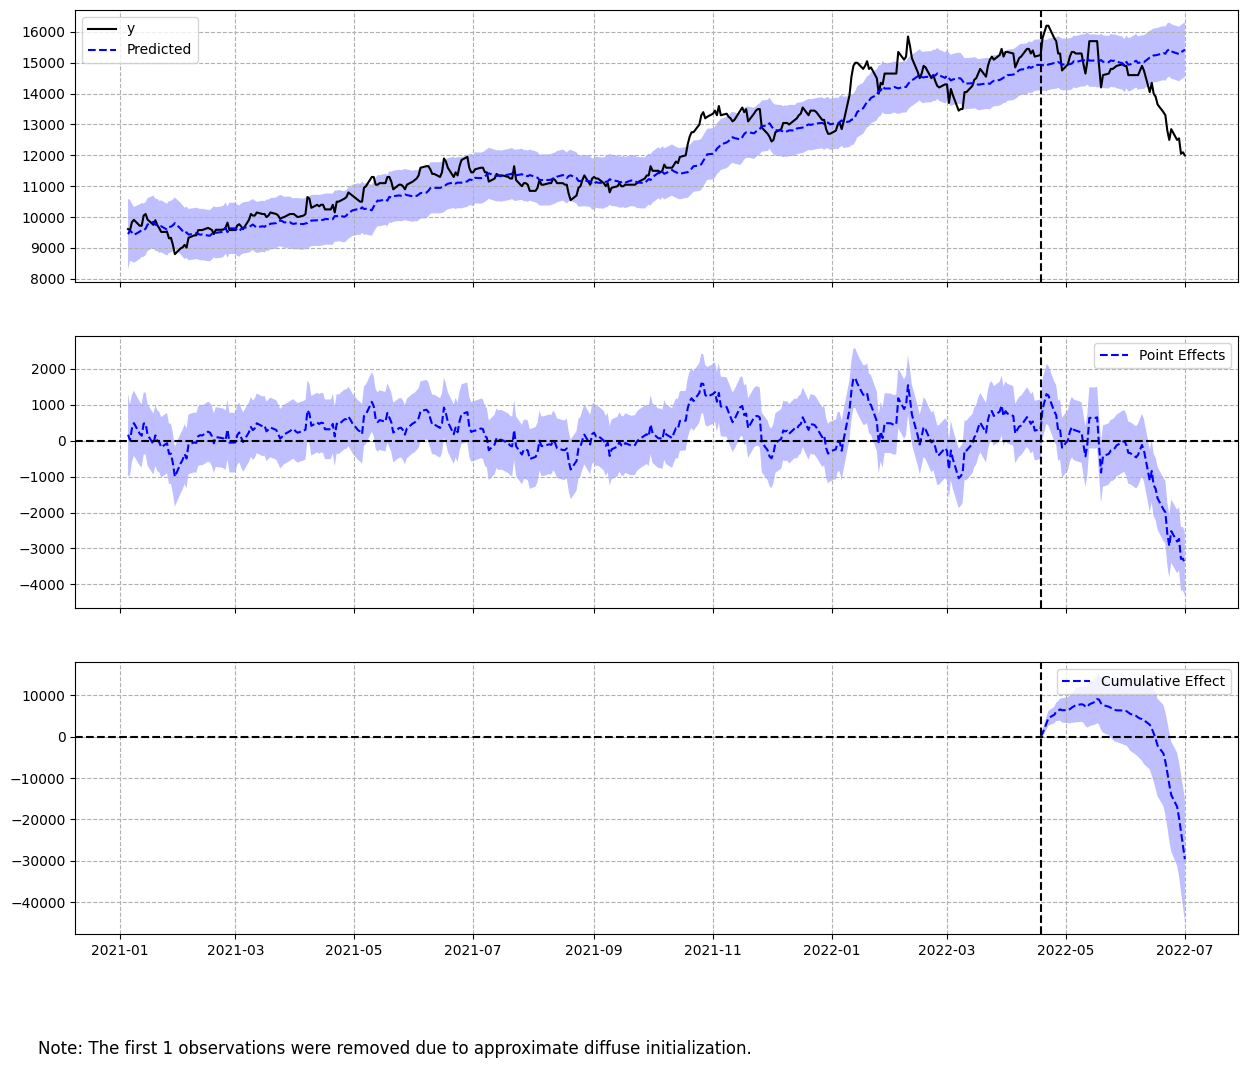

____________________________________________________________________________________________________
하나
Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    45633.33           2464200.0
Prediction (s.d.)         46785.66 (452.56)  2526425.66 (24438.36)
95% CI                    [45886.71, 47660.72][2477882.48, 2573679.11]

Absolute effect (s.d.)    -1152.33 (452.56)  -62225.66 (24438.36)
95% CI                    [-2027.39, -253.38][-109479.11, -13682.48]

Relative effect (s.d.)    -2.46% (0.97%)     -2.46% (0.97%)
95% CI                    [-4.33%, -0.54%]   [-4.33%, -0.54%]

Posterior tail-area probability p: 0.01
Posterior prob. of a causal effect: 99.2%

For more details run the command: print(impact.summary('report'))


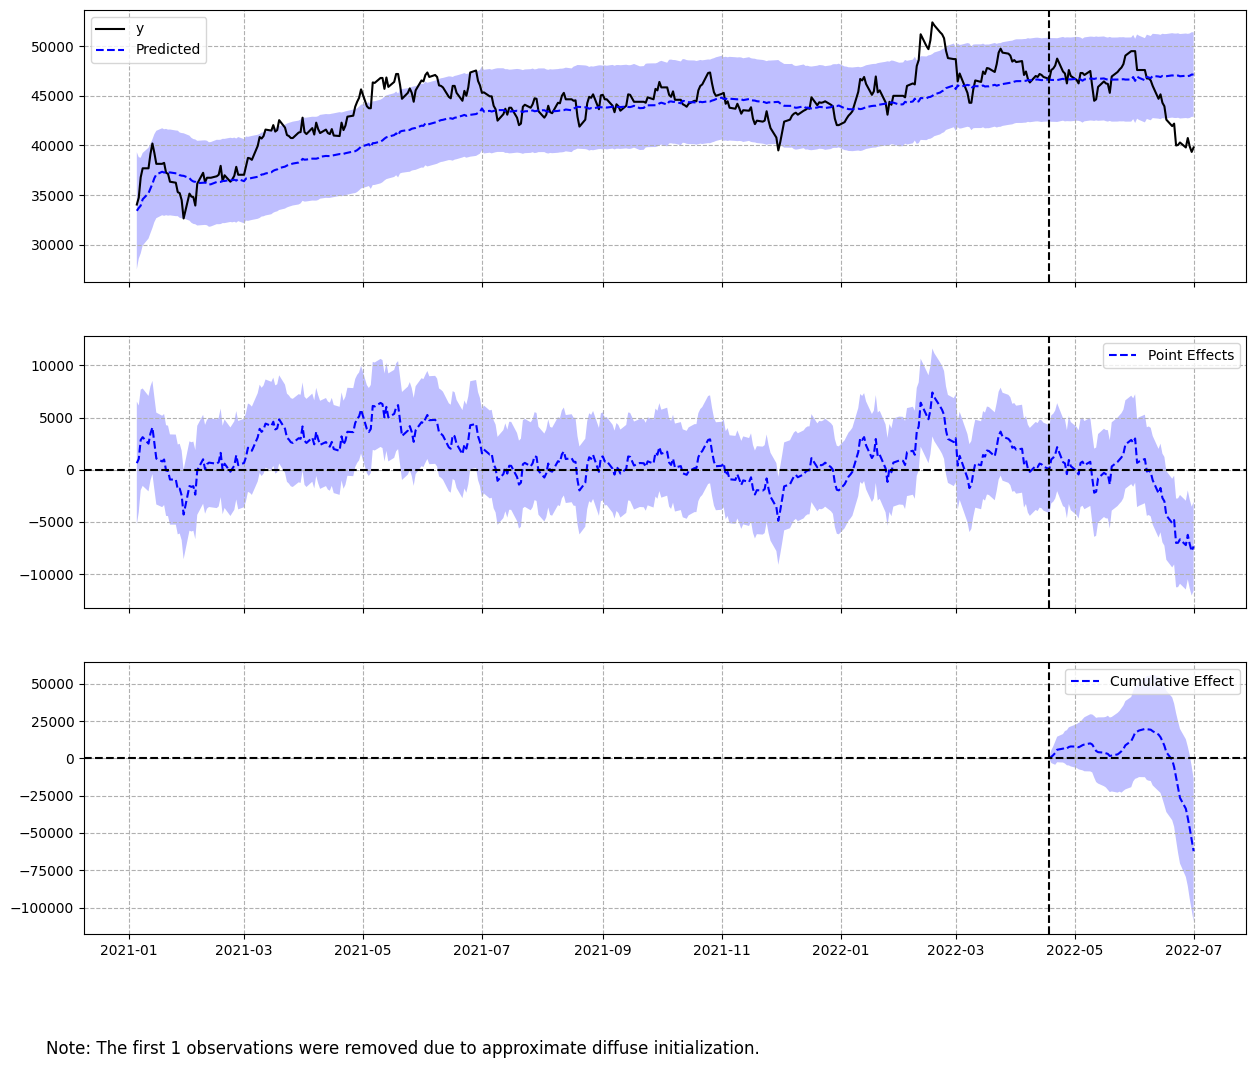

____________________________________________________________________________________________________
신한
Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    41215.74           2225650.0
Prediction (s.d.)         38394.88 (348.67)  2073323.31 (18827.99)
95% CI                    [37743.46, 39110.2][2038146.68, 2111951.04]

Absolute effect (s.d.)    2820.86 (348.67)   152326.69 (18827.99)
95% CI                    [2105.54, 3472.28] [113698.96, 187503.32]

Relative effect (s.d.)    7.35% (0.91%)      7.35% (0.91%)
95% CI                    [5.48%, 9.04%]     [5.48%, 9.04%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


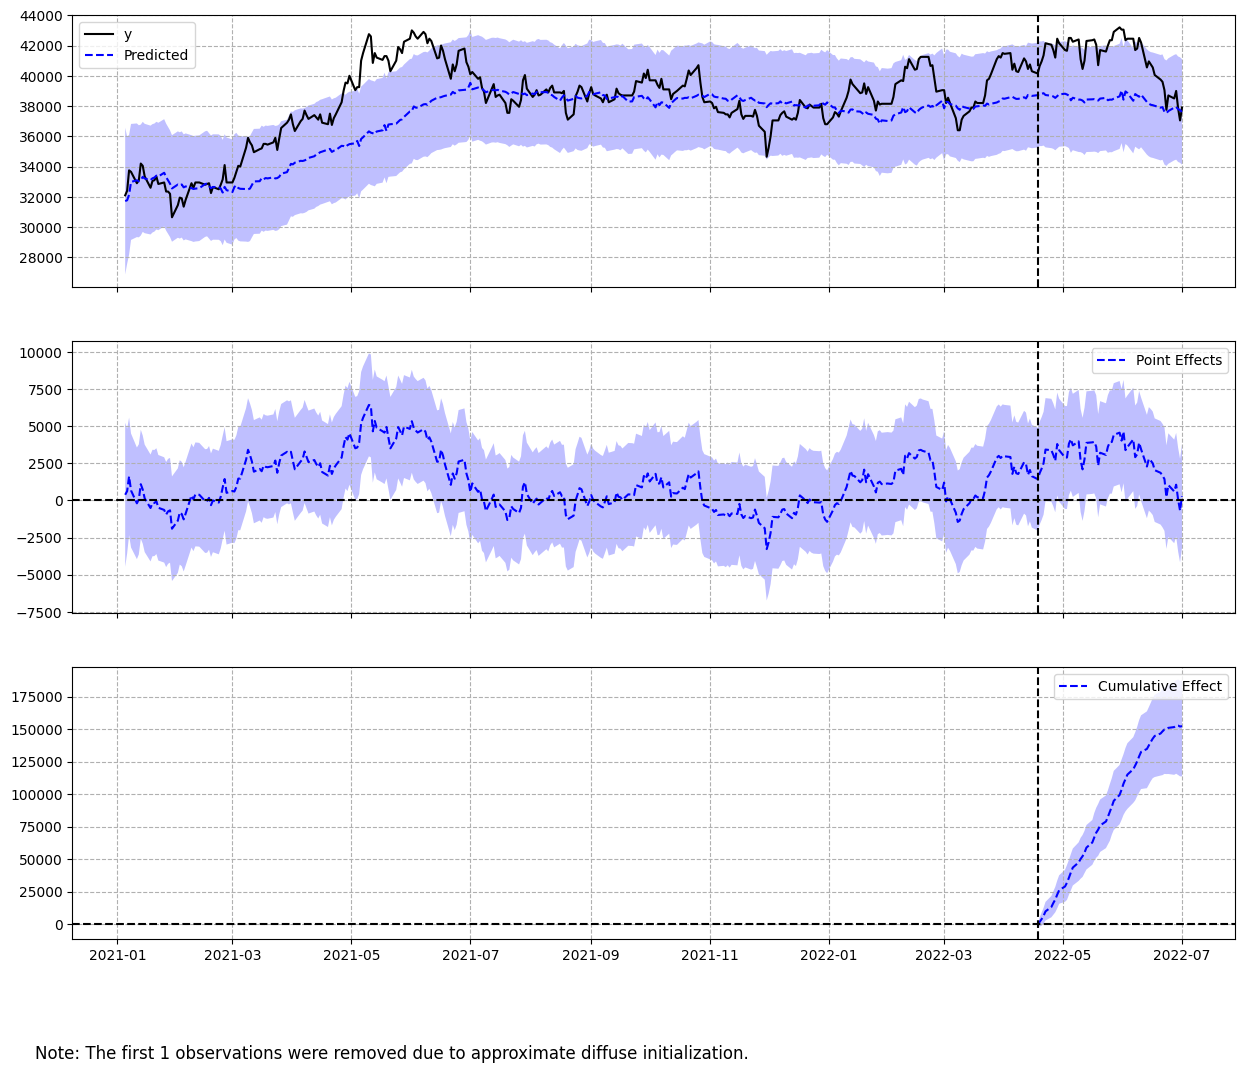

____________________________________________________________________________________________________
DGB
Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    8504.63            459250.0
Prediction (s.d.)         9233.61 (91.48)    498614.69 (4939.92)
95% CI                    [9051.33, 9409.93] [488771.96, 508136.09]

Absolute effect (s.d.)    -728.98 (91.48)    -39364.69 (4939.92)
95% CI                    [-905.3, -546.7]   [-48886.09, -29521.96]

Relative effect (s.d.)    -7.89% (0.99%)     -7.89% (0.99%)
95% CI                    [-9.8%, -5.92%]    [-9.8%, -5.92%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


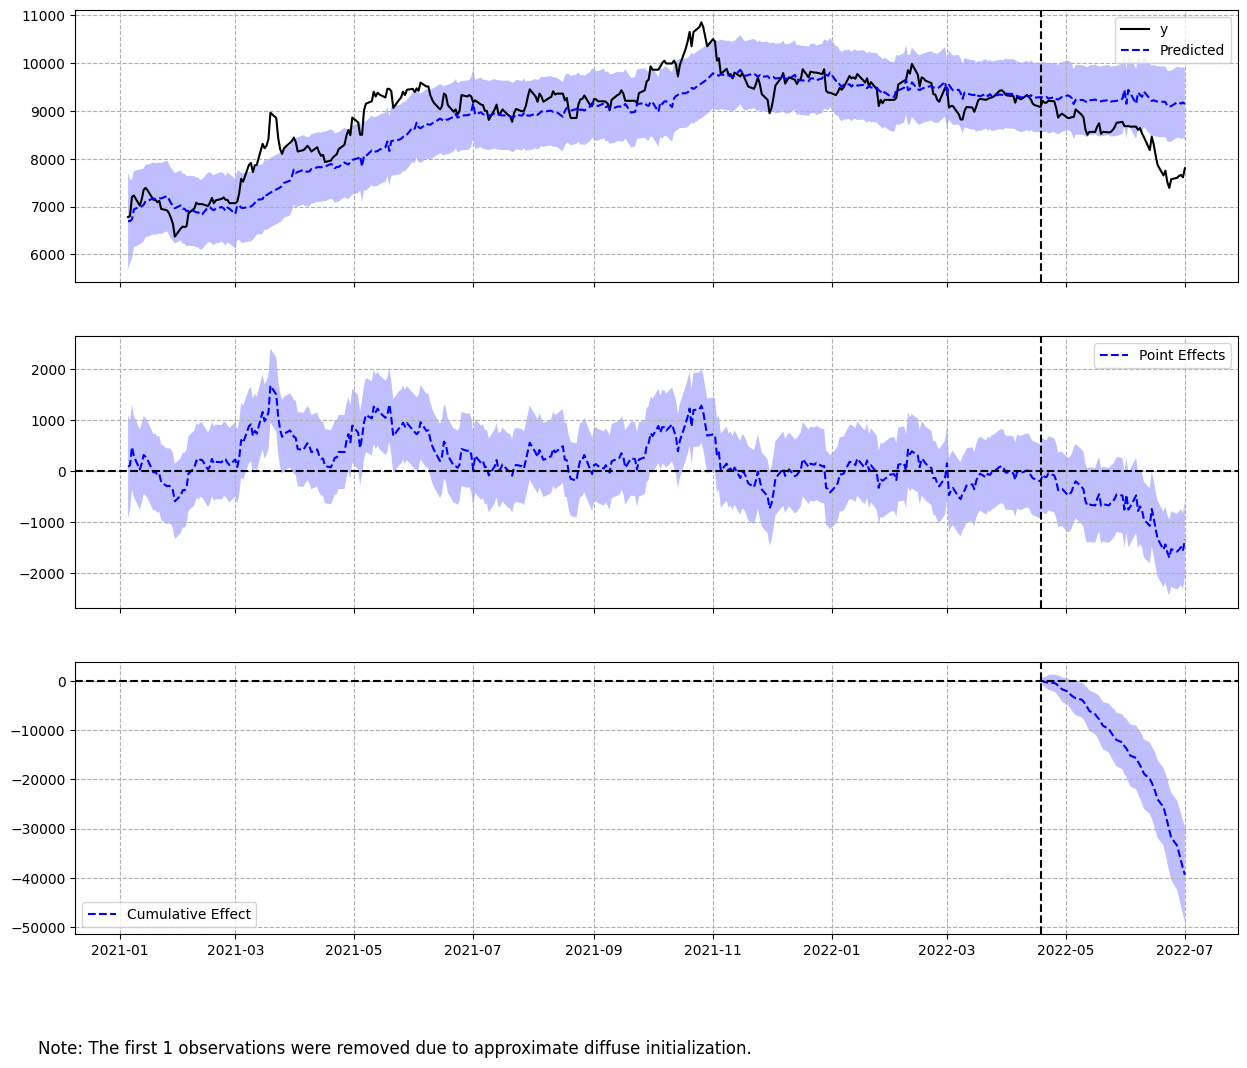

____________________________________________________________________________________________________
BNK
Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    7583.52            409510.0
Prediction (s.d.)         7856.31 (83.49)    424240.73 (4508.52)
95% CI                    [7690.87, 8018.15] [415306.78, 432979.86]

Absolute effect (s.d.)    -272.79 (83.49)    -14730.73 (4508.52)
95% CI                    [-434.63, -107.35] [-23469.86, -5796.78]

Relative effect (s.d.)    -3.47% (1.06%)     -3.47% (1.06%)
95% CI                    [-5.53%, -1.37%]   [-5.53%, -1.37%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


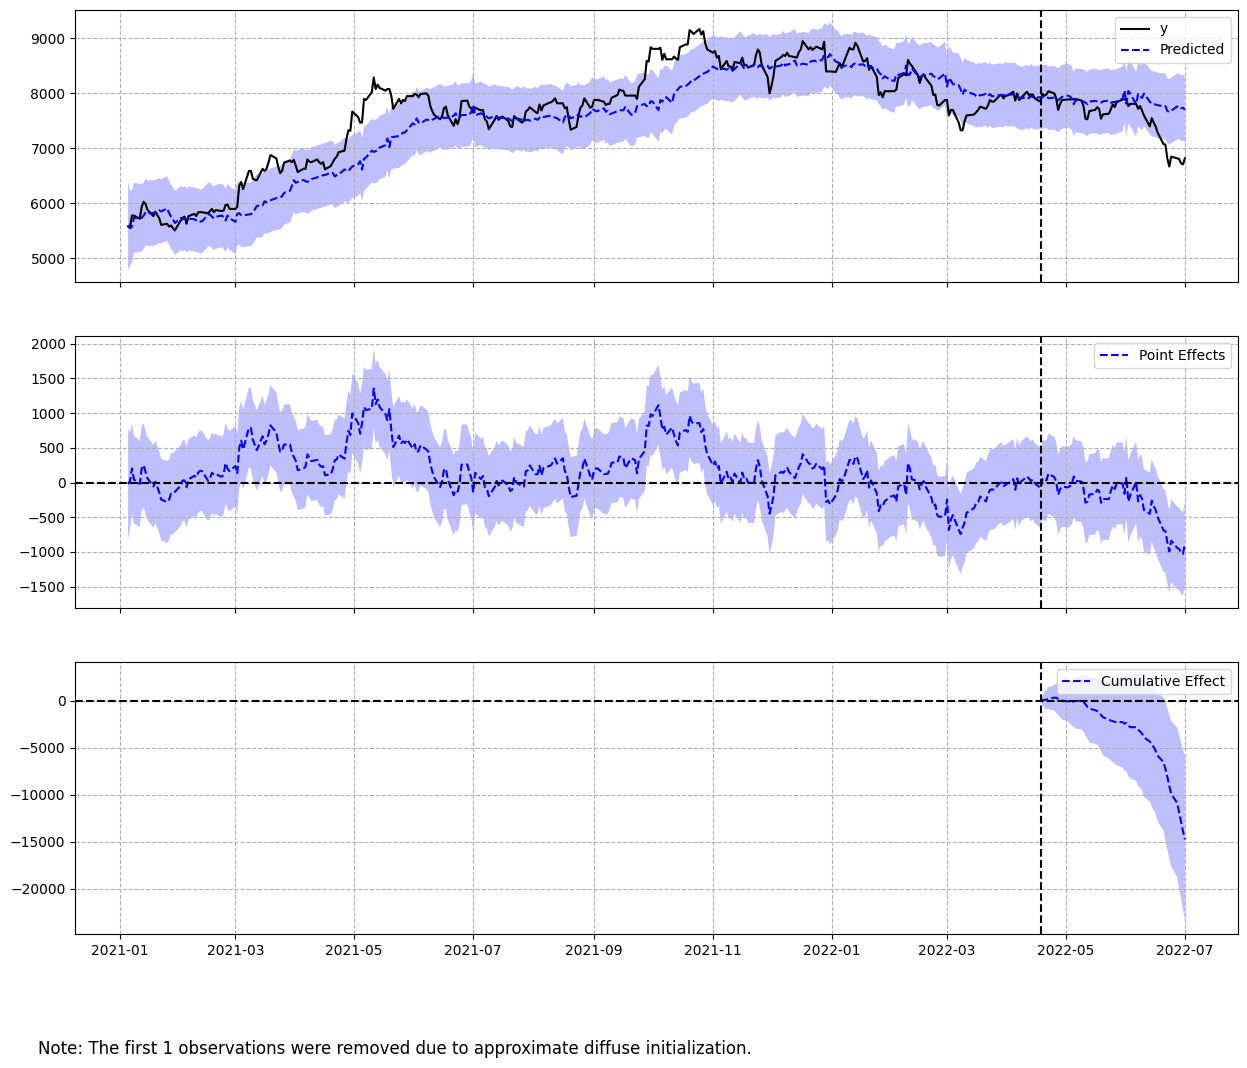

____________________________________________________________________________________________________
JB
Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    8511.48            459620.0
Prediction (s.d.)         8400.89 (80.15)    453648.16 (4328.22)
95% CI                    [8241.88, 8556.07] [445061.58, 462027.9]

Absolute effect (s.d.)    110.59 (80.15)     5971.84 (4328.22)
95% CI                    [-44.59, 269.6]    [-2407.9, 14558.42]

Relative effect (s.d.)    1.32% (0.95%)      1.32% (0.95%)
95% CI                    [-0.53%, 3.21%]    [-0.53%, 3.21%]

Posterior tail-area probability p: 0.07
Posterior prob. of a causal effect: 92.61%

For more details run the command: print(impact.summary('report'))


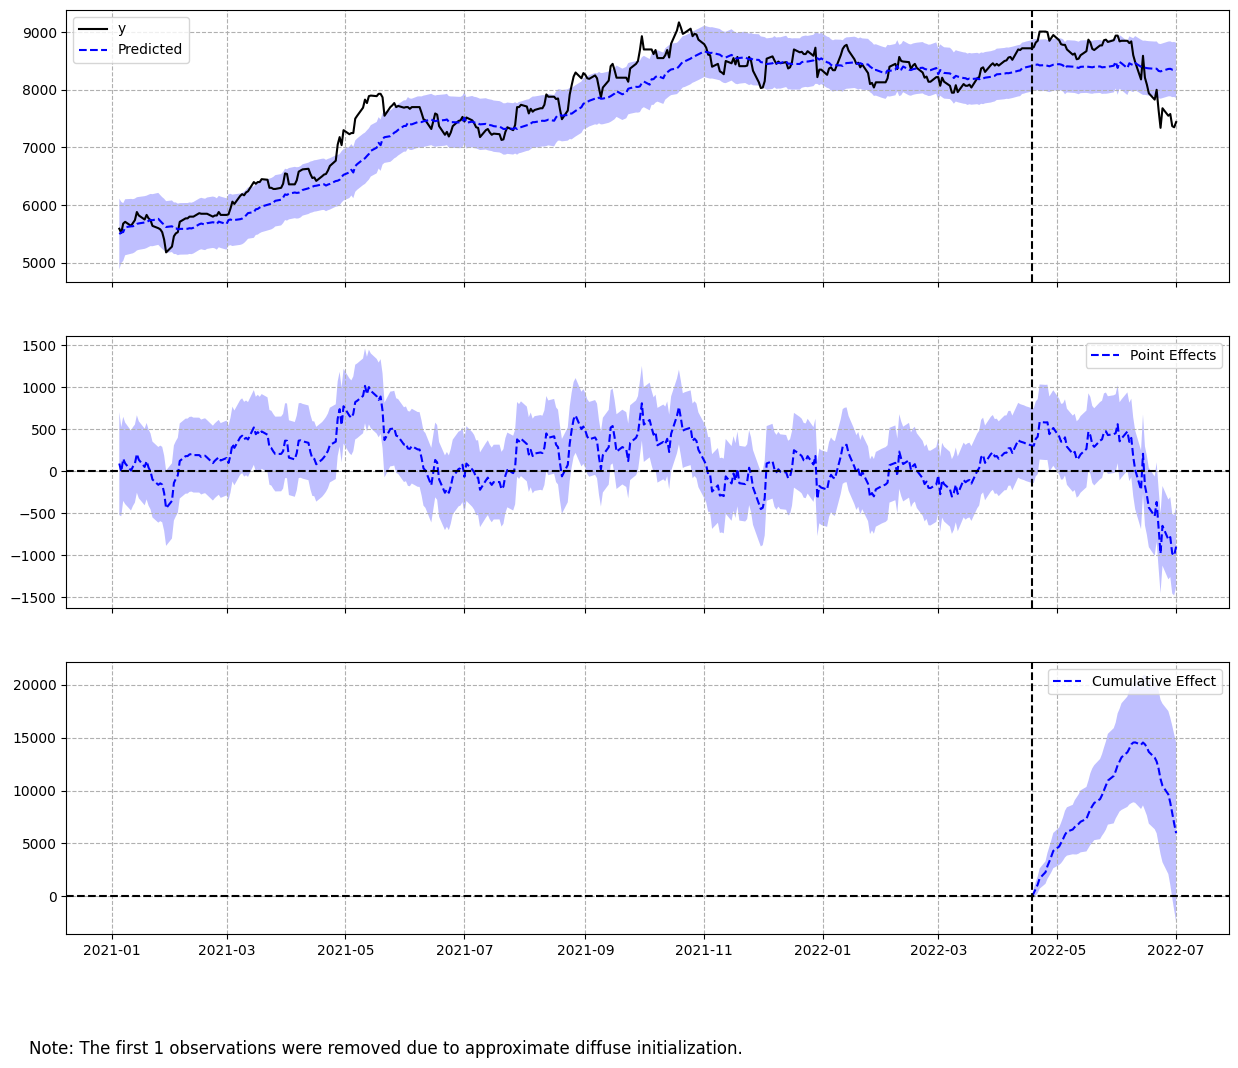

____________________________________________________________________________________________________


In [30]:
for index, row in merged_df.iteritems():
    try:
        if row.sum() > 2:
            ci = pd.DataFrame(row).join(x, how='left')
            ci = ci.join(dfc, how = 'left')
        ci_c = CausalImpact(ci, pre_period, post_period, model_args={'fit_method': 'hmc'}, nseason=[{'period': 12}])
        print(index)
        print(ci_c.summary())
        ci_c.plot()
        print('____________________________________________________________________________________________________')
    except ValueError as e:
        print(e)

## 미 연준은행 빅스텝

In [31]:
# 미 연준 빅스텝
pre_period = ['2021-01-04', '2022-07-27']
post_period = ['2022-07-28', '2022-10-28']

In [32]:
for index, row in merged_df.iteritems():
    try:
        if row.sum() > 2:
            ci = pd.DataFrame(row).join(x, how='left')
            ci = ci.join(dfc, how = 'left')
        cib = CausalImpact(ci, pre_period, post_period, model_args={'fit_method': 'hmc'}, nseason=[{'period': 12}])
        summary = cib.summary_data.to_dict()
        print(index + "," + str(round(summary['average'].get('abs_effect'),2)) + ',' + str(round((summary['average'].get('rel_effect')*100),2)) + '%,' + str(round(cib.p_value,2)))
    except ValueError as e:
        print(e)

KB,-4336.56%,-8.28%,0.0
우리,-817.76%,-6.52%,0.0
하나,-3469.46%,-8.33%,0.0
신한,-2547.95%,-6.69%,0.0
DGB,-593.96%,-7.51%,0.0
BNK,-332.67%,-4.85%,0.0
JB,-228.01%,-3.01%,0.0


KB
Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    48052.99           3219550.0
Prediction (s.d.)         52389.54 (656.75)  3510099.32 (44002.38)
95% CI                    [51111.14, 53685.56][3424446.23, 3596932.38]

Absolute effect (s.d.)    -4336.56 (656.75)  -290549.32 (44002.38)
95% CI                    [-5632.57, -3058.15][-377382.38, -204896.23]

Relative effect (s.d.)    -8.28% (1.25%)     -8.28% (1.25%)
95% CI                    [-10.75%, -5.84%]  [-10.75%, -5.84%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


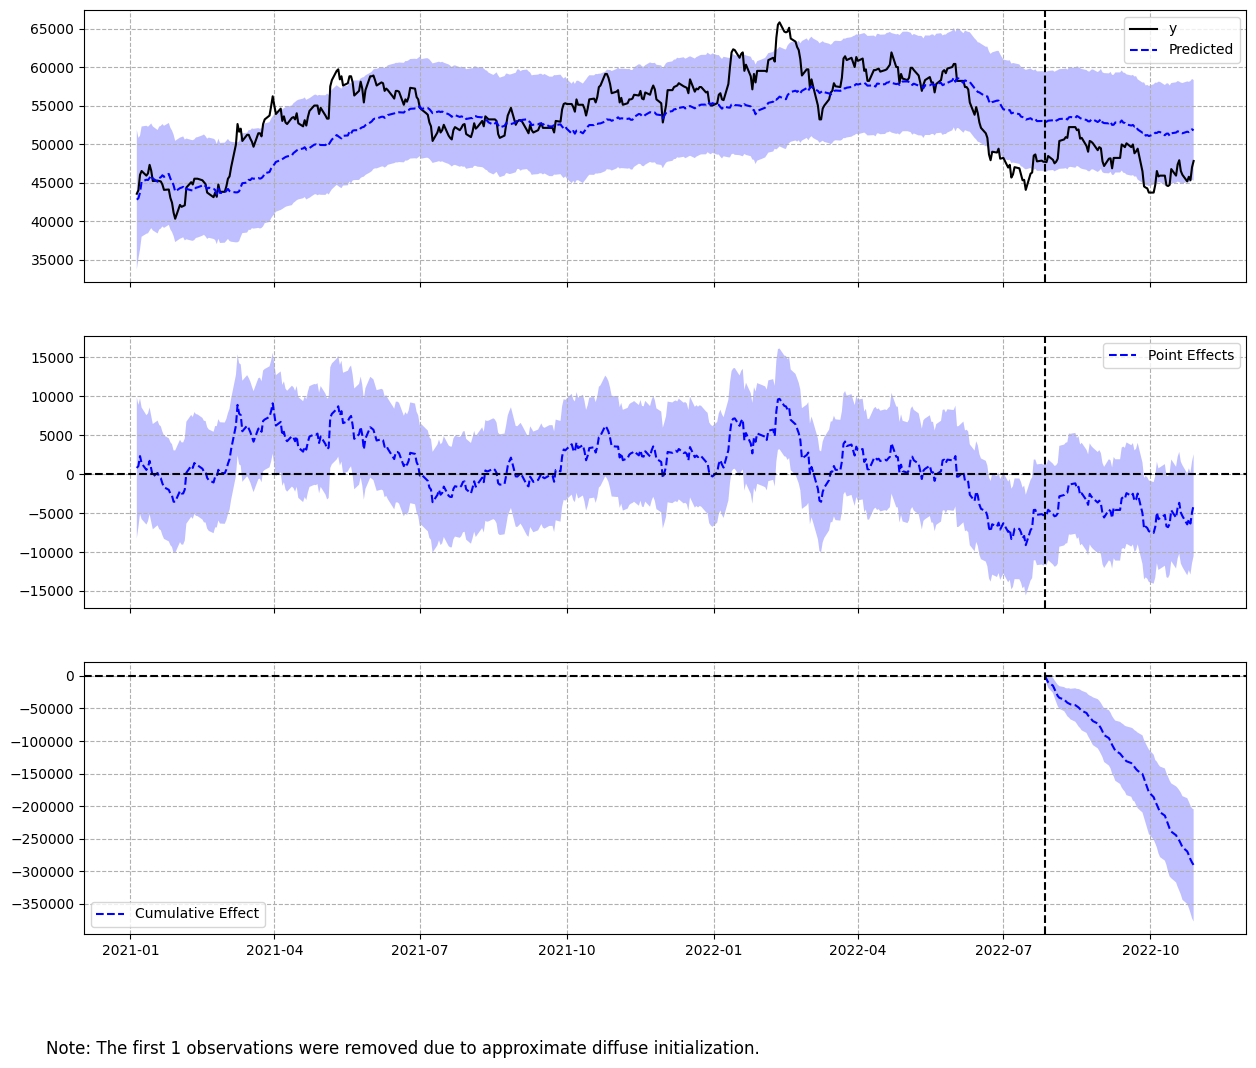

____________________________________________________________________________________________________
우리
Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    11717.16           785050.0
Prediction (s.d.)         12534.92 (159.57)  839839.82 (10690.94)
95% CI                    [12215.45, 12840.94][818435.43, 860343.15]

Absolute effect (s.d.)    -817.76 (159.57)   -54789.82 (10690.94)
95% CI                    [-1123.78, -498.29][-75293.15, -33385.43]

Relative effect (s.d.)    -6.52% (1.27%)     -6.52% (1.27%)
95% CI                    [-8.97%, -3.98%]   [-8.97%, -3.98%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


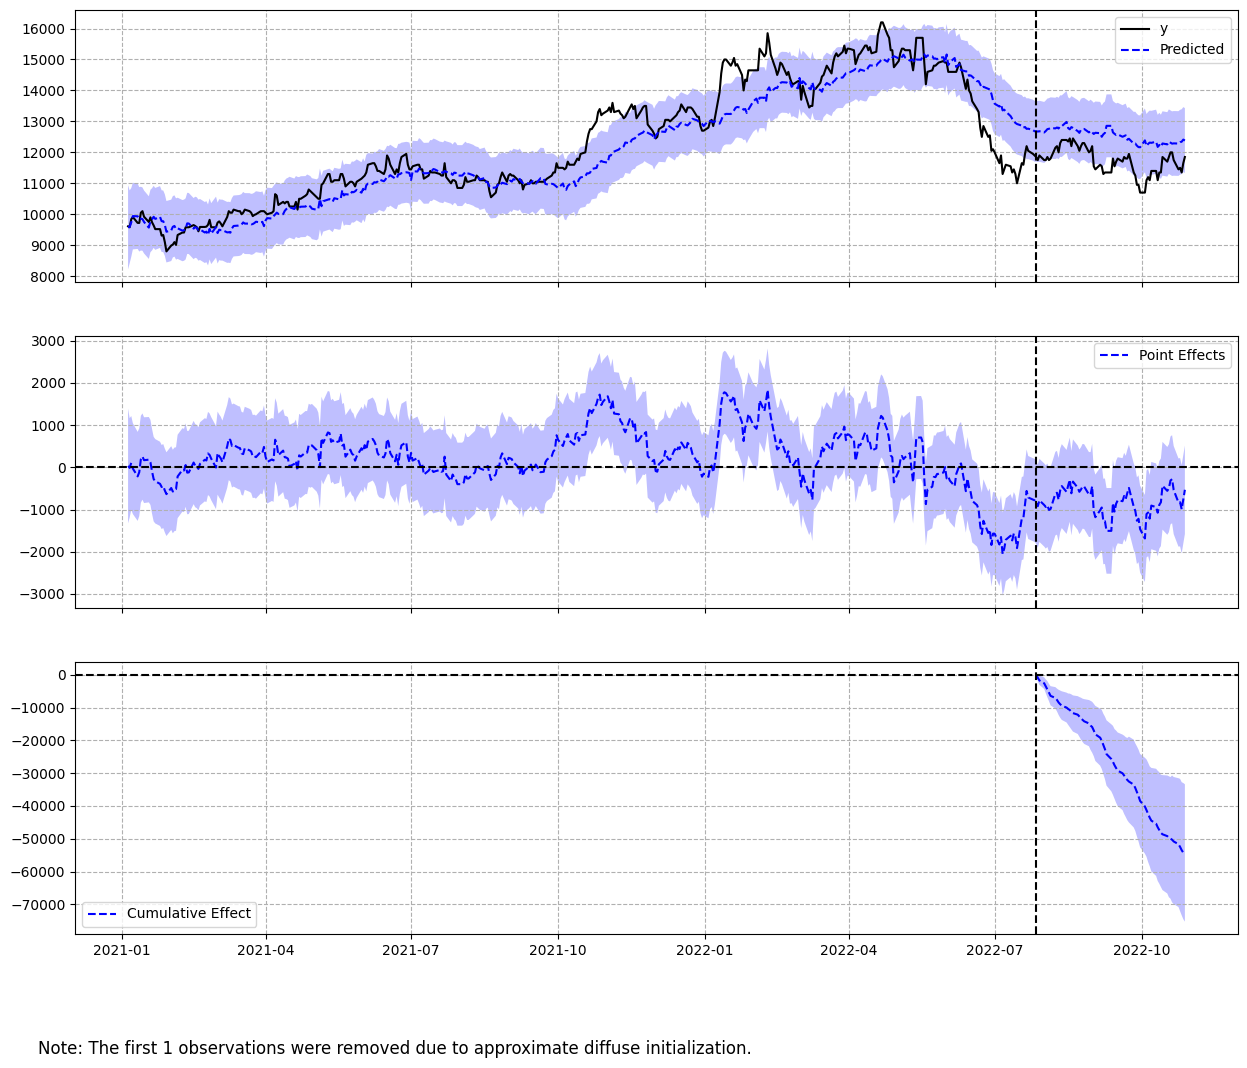

____________________________________________________________________________________________________
하나
Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    38181.34           2558150.0
Prediction (s.d.)         41650.81 (470.8)   2790604.0 (31543.3)
95% CI                    [40748.09, 42593.57][2730121.99, 2853769.47]

Absolute effect (s.d.)    -3469.46 (470.8)   -232454.0 (31543.3)
95% CI                    [-4412.23, -2566.75][-295619.47, -171971.99]

Relative effect (s.d.)    -8.33% (1.13%)     -8.33% (1.13%)
95% CI                    [-10.59%, -6.16%]  [-10.59%, -6.16%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


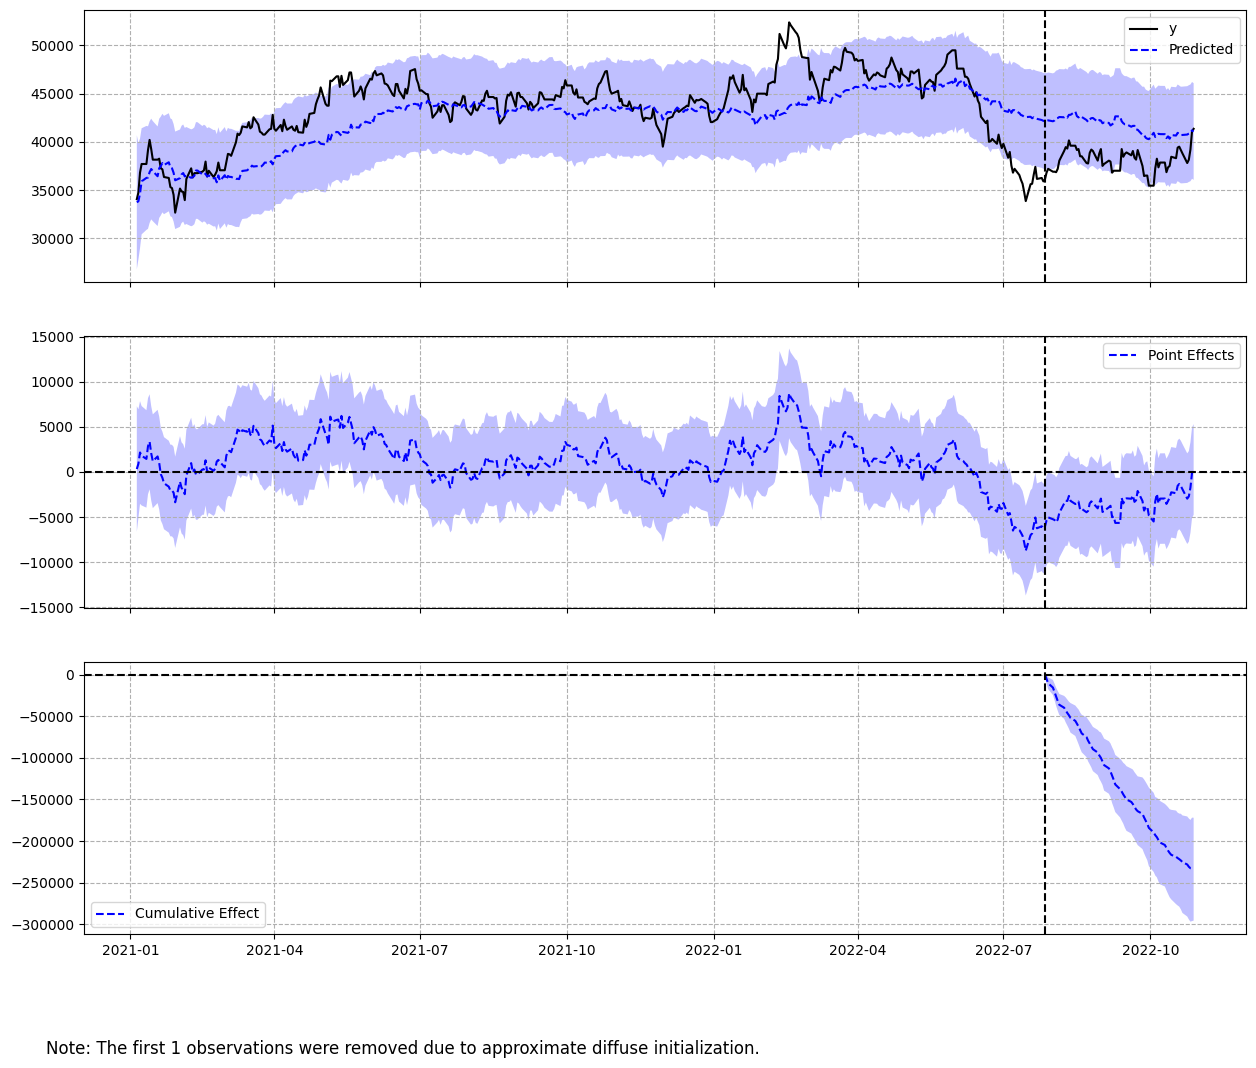

____________________________________________________________________________________________________
신한
Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    35541.04           2381250.0
Prediction (s.d.)         38089.0 (365.88)   2551962.92 (24514.11)
95% CI                    [37378.78, 38813.02][2504378.53, 2600472.07]

Absolute effect (s.d.)    -2547.95 (365.88)  -170712.92 (24514.11)
95% CI                    [-3271.97, -1837.74][-219222.07, -123128.53]

Relative effect (s.d.)    -6.69% (0.96%)     -6.69% (0.96%)
95% CI                    [-8.59%, -4.82%]   [-8.59%, -4.82%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


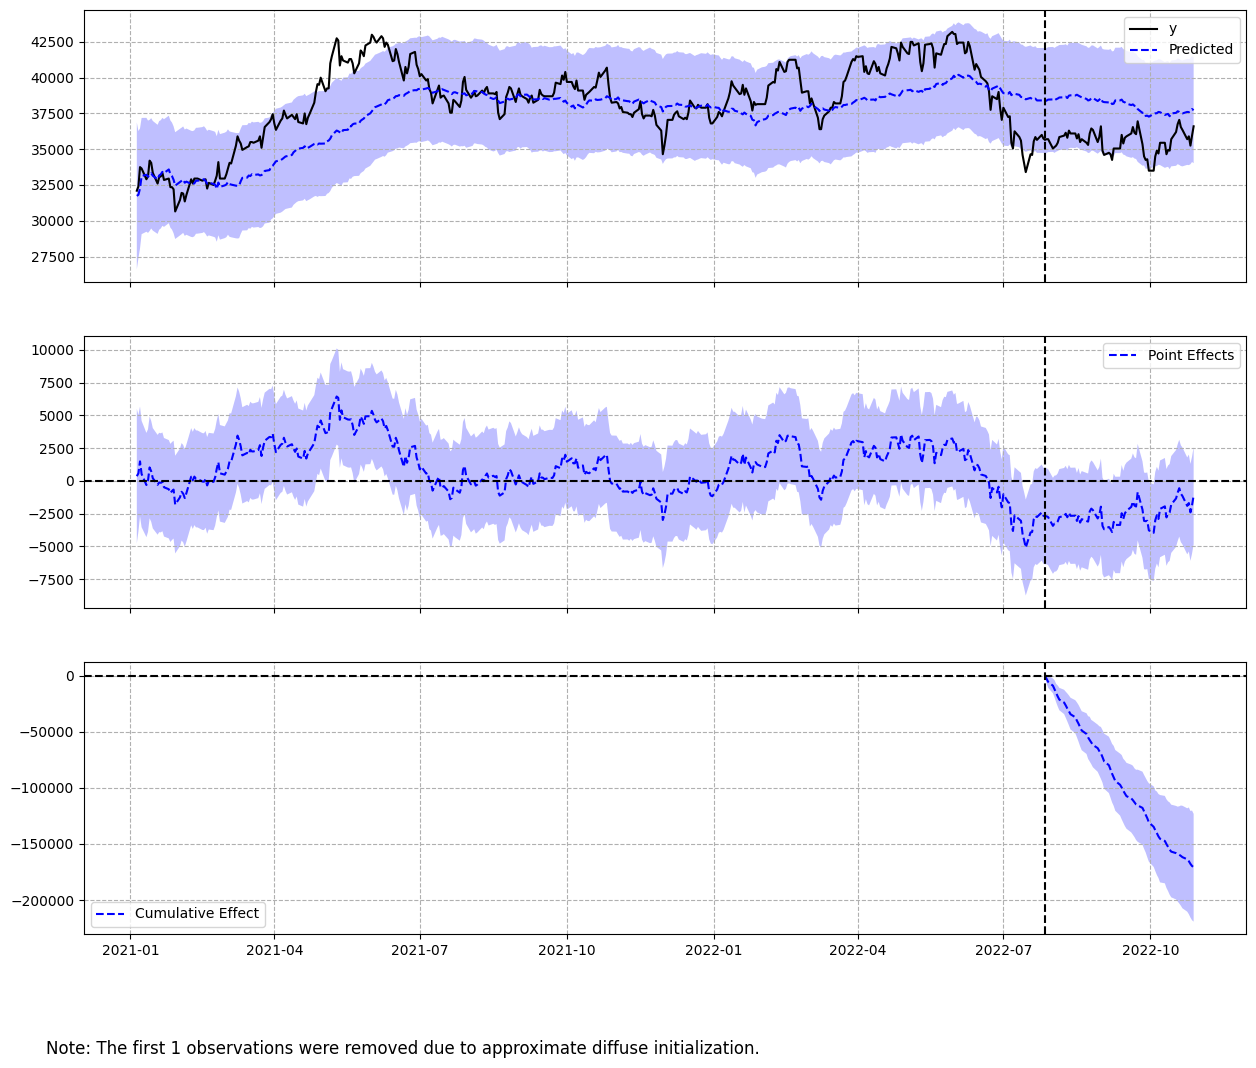

____________________________________________________________________________________________________
DGB
Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    7320.15            490450.0
Prediction (s.d.)         7914.11 (92.0)     530245.42 (6164.2)
95% CI                    [7727.43, 8088.07] [517737.51, 541900.74]

Absolute effect (s.d.)    -593.96 (92.0)     -39795.42 (6164.2)
95% CI                    [-767.92, -407.28] [-51450.74, -27287.51]

Relative effect (s.d.)    -7.51% (1.16%)     -7.51% (1.16%)
95% CI                    [-9.7%, -5.15%]    [-9.7%, -5.15%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


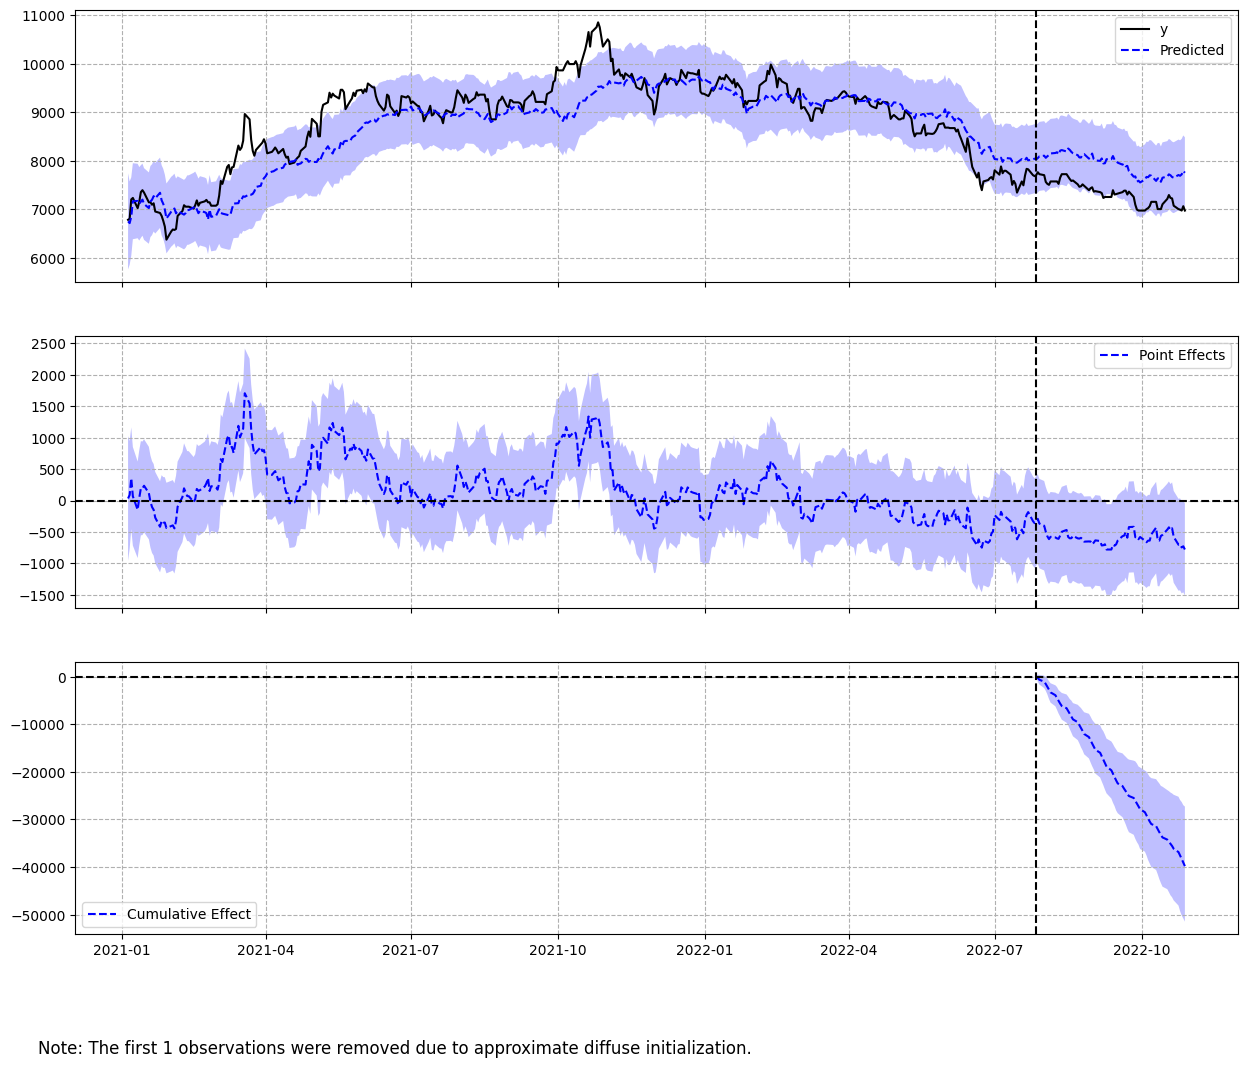

____________________________________________________________________________________________________
BNK
Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    6526.12            437250.0
Prediction (s.d.)         6858.79 (83.04)    459539.2 (5563.94)
95% CI                    [6694.94, 7020.46] [448560.7, 470370.93]

Absolute effect (s.d.)    -332.67 (83.04)    -22289.2 (5563.94)
95% CI                    [-494.34, -168.82] [-33120.93, -11310.7]

Relative effect (s.d.)    -4.85% (1.21%)     -4.85% (1.21%)
95% CI                    [-7.21%, -2.46%]   [-7.21%, -2.46%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


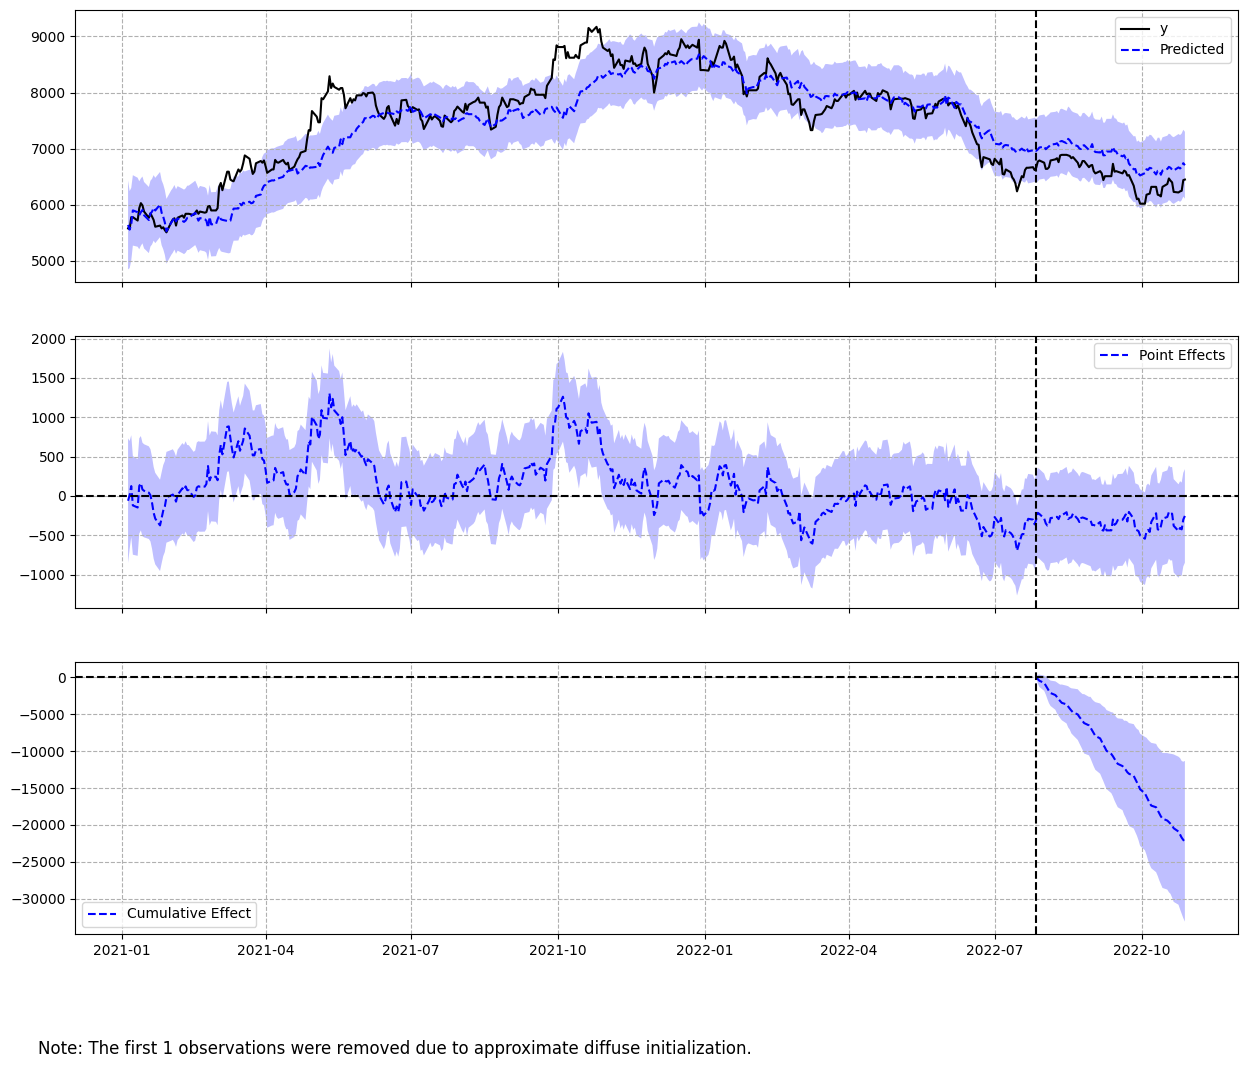

____________________________________________________________________________________________________
JB
Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    7336.57            491550.0
Prediction (s.d.)         7564.58 (89.07)    506826.6 (5967.38)
95% CI                    [7388.64, 7737.77] [495038.77, 518430.46]

Absolute effect (s.d.)    -228.01 (89.07)    -15276.6 (5967.38)
95% CI                    [-401.2, -52.07]   [-26880.46, -3488.77]

Relative effect (s.d.)    -3.01% (1.18%)     -3.01% (1.18%)
95% CI                    [-5.3%, -0.69%]    [-5.3%, -0.69%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 99.6%

For more details run the command: print(impact.summary('report'))


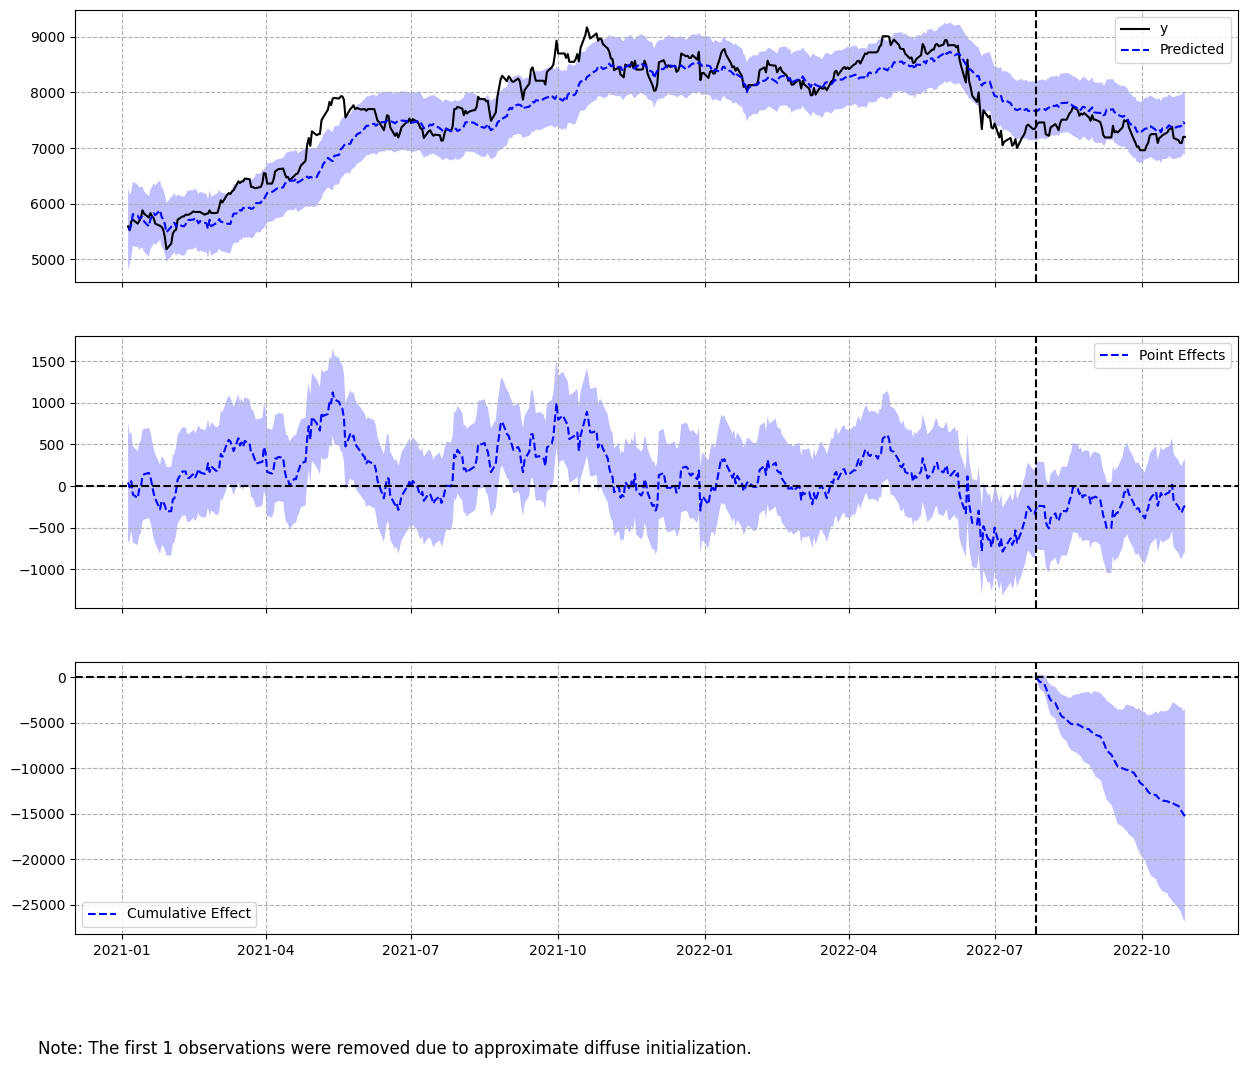

____________________________________________________________________________________________________


In [33]:
for index, row in merged_df.iteritems():
    try:
        if row.sum() > 2:
            ci = pd.DataFrame(row).join(x, how='left')
            ci = ci.join(dfc, how = 'left')
        ci_c = CausalImpact(ci, pre_period, post_period, model_args={'fit_method': 'hmc'}, nseason=[{'period': 12}])
        print(index)
        print(ci_c.summary())
        ci_c.plot()
        print('____________________________________________________________________________________________________')
    except ValueError as e:
        print(e)

In [34]:
'''for index, row in merged_df.iteritems():
    try:
        ci_o = CausalImpact(row, pre_period, post_period, model_args={'fit_method': 'hmc'})
        print(index)
        print(ci_o.summary())
        ci_o.plot()
        print('____________________________________________________________________________________________________')
    except ValueError as e:
        print(e)'''

"for index, row in merged_df.iteritems():\n    try:\n        ci_o = CausalImpact(row, pre_period, post_period, model_args={'fit_method': 'hmc'})\n        print(index)\n        print(ci_o.summary())\n        ci_o.plot()\n        print('____________________________________________________________________________________________________')\n    except ValueError as e:\n        print(e)"

# 신한은행 Causal 분석

In [35]:
Sinhan = merged_df[['신한', '우리','KB']]
Sinhan

신한       우리       KB
2021-01-04  31550.0   9510.0  42450.0
2021-01-05  32100.0   9610.0  43550.0
2021-01-06  32400.0   9580.0  44000.0
2021-01-07  33750.0   9840.0  46000.0
2021-01-08  33650.0   9910.0  46500.0
...             ...      ...      ...
2023-06-23  34400.0  11930.0  46950.0
2023-06-26  34650.0  11960.0  47200.0
2023-06-27  34650.0  11960.0  47550.0
2023-06-28  34700.0  11980.0  48150.0
2023-06-29  33850.0  11610.0  47100.0

[649 rows x 3 columns]

In [36]:
# 신한은행 서울 1,2금고 선
pre_period = ['2021-01-04', '2022-04-14']
post_period = ['2022-04-15', '2022-07-01']

In [39]:
ci_s = CausalImpact(Sinhan, pre_period, post_period, model_args={'fit_method': 'hmc'}, nseason=[{'period': 12}])
summary = ci_s.summary_data.to_dict()
print("신한," + str(round(summary['average'].get('abs_effect'),2)) + ',' + str(round((summary['average'].get('rel_effect')*100),2)) + '%,' + str(round(ci_s.p_value,2)))

신한,2618.16,6.79%,0.0


Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    41180.36           2306100.0
Prediction (s.d.)         38562.2 (205.9)    2159482.95 (11530.38)
95% CI                    [38161.76, 38968.88][2137058.75, 2182257.01]

Absolute effect (s.d.)    2618.16 (205.9)    146617.05 (11530.38)
95% CI                    [2211.48, 3018.59] [123842.99, 169041.25]

Relative effect (s.d.)    6.79% (0.53%)      6.79% (0.53%)
95% CI                    [5.73%, 7.83%]     [5.73%, 7.83%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


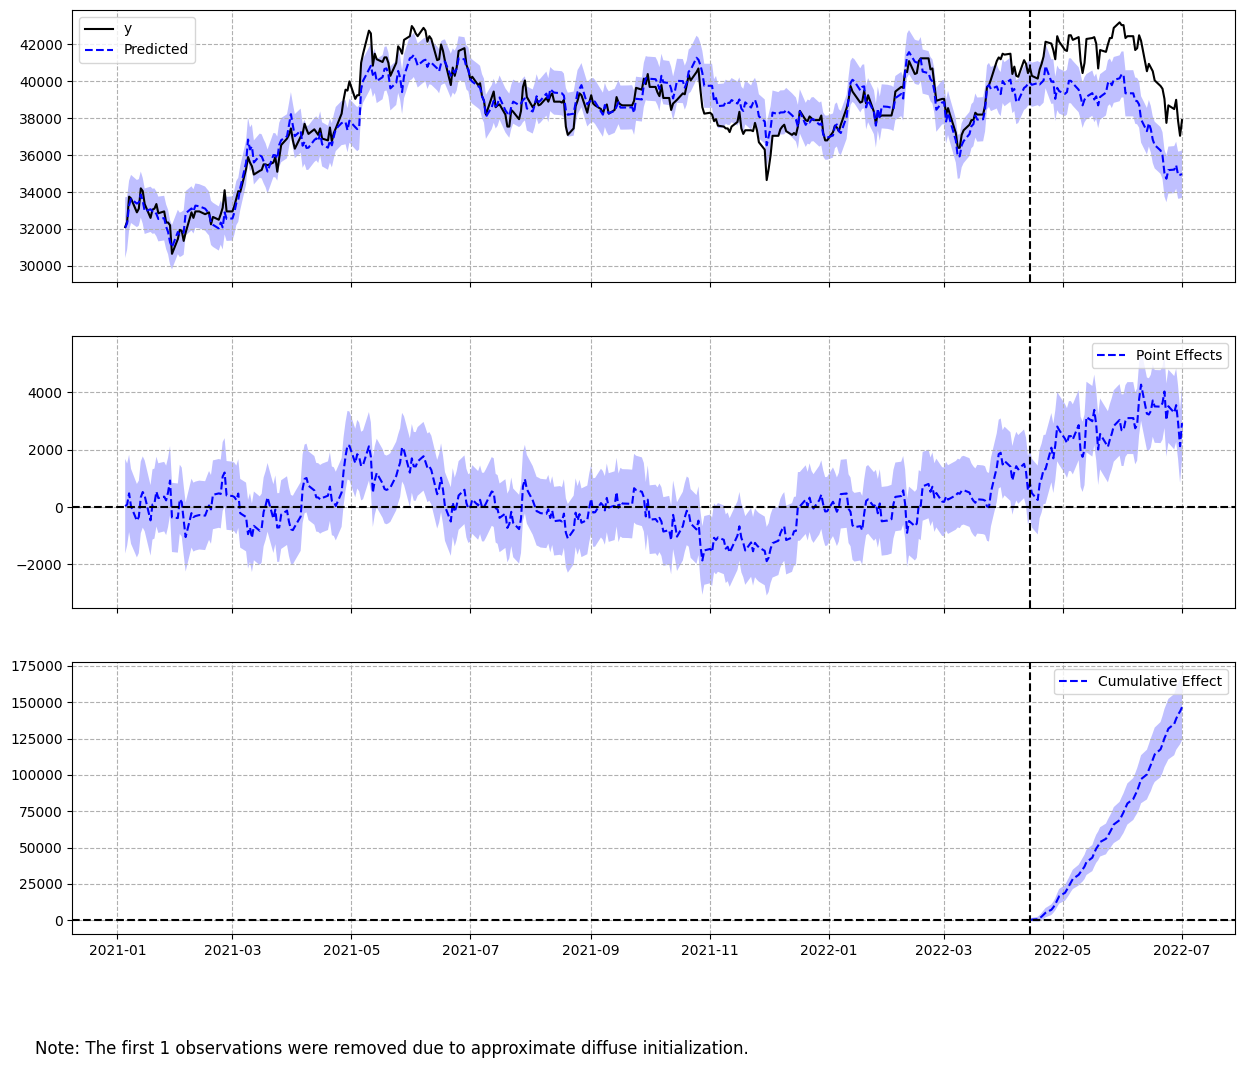

In [40]:
ci_s = CausalImpact(Sinhan, pre_period, post_period, model_args={'fit_method': 'hmc'}, nseason=[{'period': 12}])
print(ci_s.summary())
ci_s.plot()